# 전처리
- col 71 = PYE_C1M210000 = 신카 건수
- col 74 = PYE_C18233005 = 1년 전 신카 기관수

In [1]:
# 전처리 파일 찾을 수 있게 폴더 위치 지정
import sys
import os

# 현재 실행 중인 디렉토리 확인
print("현재 디렉토리:", os.getcwd())

# package 폴더가 있는 경로 추가
sys.path.append(os.path.abspath("/content/drive/MyDrive/한국경제신문 with toss bank/중간 프로젝트/hk-toss-middle-project/package"))

# 이제 import 가능!
from preprocessing.test_pipeline import preprocessing_customer_data

현재 디렉토리: /content


In [2]:
import pandas as pd

df_21 = pd.read_csv("/content/drive/MyDrive/한국경제신문 with toss bank/중간 프로젝트/data/11.통신카드CB 결합정보/202112_통신카드CB결합.csv")
df_22 = pd.read_csv("/content/drive/MyDrive/한국경제신문 with toss bank/중간 프로젝트/data/11.통신카드CB 결합정보/202212_통신카드CB결합.csv")

df = preprocessing_customer_data(df_21, df_22)

/content/drive/MyDrive/한국경제신문 with toss bank/중간 프로젝트/hk-toss-middle-project/package/preprocessing/test_pipeline.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22["이탈여부"] = (df_21["PYE_C18233005"] - df_22["PYE_C18233005"] > 0).astype(int)


In [3]:
df

BASE_YM     CUST_ID  SEX  AGE  JB_TP  HOME_ADM  COM_ADM  HIGHEND_CD1  \
0        202212       SYN_0    2   35    420        42     42.0            0   
1        202212       SYN_1    2   50    910        41     11.0            0   
3        202212       SYN_3    1   25    910        11     11.0            0   
4        202212       SYN_4    2   40    420        47     47.0            0   
5        202212       SYN_5    2   55    510        11     11.0            0   
...         ...         ...  ...  ...    ...       ...      ...          ...   
329994   202212  SYN_329994    1   40    510        41      NaN            1   
329995   202212  SYN_329995    1   55    510        11     11.0            1   
329996   202212  SYN_329996    2   60    910        41      NaN            0   
329998   202212  SYN_329998    2   45    420        29      NaN            0   
329999   202212  SYN_329999    1   55    420        41     41.0            0   

        HIGHEND_CD2  HIGHEND_CD3  ...  YOY_R3M_ITRT_ENT_MUSIC_CS  \
0                 0            0  ...                          0   
1                 0            0  ...                          0   
3                 0            0  ...                          0   
4                 0            0  ...                          0   
5                 0            0  ...                          0   
...             ...          ...  ...                        ...   
329994            0            0  ...                          0   
329995            0            0  ...                          0   
329996            0            0  ...                          0   
329998            0            0  ...                          0   
329999            0            0  ...                          0   

        YOY_R3M_ITRT_INFO_NEWS_CS  YOY_R3M_ITRT_INFO_BOOK_CS  \
0                               0                          0   
1                               1                          0   
3                               0                          0   
4                               0                          0   
5                               0                          0   
...                           ...                        ...   
329994                          0                          0   
329995                          0                          0   
329996                          0                          0   
329998                          0                          0   
329999                          0                          0   

       YOY_R3M_ITRT_INFO_BLOG_CS  YOY_R3M_ITRT_INFO_PORTAL_CS  \
0                              0                            0   
1                              0                            0   
3                              0                            0   
4                              0                            0   
5                              0                            0   
...                          ...                          ...   
329994                         0                            0   
329995                         0                            0   
329996                         0                            0   
329998                         0                            0   
329999                         0                            0   

       YOY_R3M_ITRT_COMM_SNS_CS  YOY_R3M_ITRT_COMM_VOIP_CS  \
0                             0                          0   
1                             0                          0   
3                             0                          0   
4                             0                          0   
5                             0                          0   
...                         ...                        ...   
329994                        0                          0   
329995                        0                          0   
329996                        0                          0   
329998                        0                          0  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283945 entries, 0 to 329999
Columns: 739 entries, BASE_YM to 이탈여부
dtypes: float64(369), int64(364), object(6)
memory usage: 1.6+ GB


In [5]:
# 신카건수, 1년전신카기관수, 이탈여부 확인
df[['PYE_C1M210000', 'PYE_C18233005', '이탈여부']]

PYE_C1M210000  PYE_C18233005  이탈여부
0                 1.0            1.0     0
1                 2.0            2.0     0
3                 2.0            1.0     0
4                 2.0            2.0     0
5                 3.0            3.0     0
...               ...            ...   ...
329994            4.0            5.0     0
329995            7.0            7.0     0
329996            1.0            1.0     0
329998            3.0            3.0     0
329999            5.0            5.0     0

[283945 rows x 3 columns]

In [6]:
# 그냥 이것저것 확인용

# df[df['PYE_C1M210000'] == 0]
# df[df['이탈여부'] == 1]
df[df.columns[738]]

0         0
1         0
3         0
4         0
5         0
         ..
329994    0
329995    0
329996    0
329998    0
329999    0
Name: 이탈여부, Length: 283945, dtype: int64

# 데이터프레임 생성 - 사용할 컬럼만 가져오기

### 이용금액(+@) 관련 컬럼 리스트
- 1  `CUST_ID`  고객식별자
- 2  `SEX`  성별
- 3  `AGE`  연령대
- 142	`R3M_FOOD_AMT`           최근3개월_요식_이용금액
- 143	`R3M_ENT_AMT`            최근3개월_유흥_이용금액
- 144	`R3M_DEP_AMT`            최근3개월_백화점_이용금액
- 145	`R3M_MART_AMT`           최근3개월_대형할인점_이용금액
- 146	`R3M_SSM_AMT`            최근3개월_소형유통점_이용금액
- 147	`R3M_CLOTHES_AMT`        최근3개월_의류/잡화_이용금액
- 148	`R3M_CUL_AMT`            최근3개월_스포츠/문화/레저_이용금액
- 149	`R3M_ACCO_AMT`           최근3개월_숙박_이용금액
- 150	`R3M_TRAVEL_AMT`         최근3개월_여행_이용금액
- 151	`R3M_TRANS_AMT`          최근3개월_교통_이용금액
- 152	`R3M_BEAUTY_AMT`         최근3개월_미용_이용금액
- 153	`R3M_HOUSEHOLD_AMT`      최근3개월_가정생활/서비스_이용금액
- 154	`R3M_EDU_AMT`            최근3개월_교육/학원_이용금액
- 155	`R3M_MED_AMT`            최근3개월_의료_이용금액
- 156	`R3M_FURN_AMT`           최근3개월_가전/가구_이용금액
- 157	`R3M_CAR_AMT`            최근3개월_자동차판매_이용금액
- 158	`R3M_CAR_SERVICE_AMT`    최근3개월_자동차서비스/용품_이용금액
- 159	`R3M_OIL_AMT`            최근3개월_주유_이용금액
- 160	`R3M_E_COMM_AMT`         최근3개월_전자상거래_이용금액
- 161	`R3M_DLV_AMT`            최근3개월_배달앱_이용금액
- 162	`R3M_HOTEL_AMT`          최근3개월_특급호텔_이용금액
- 163	`R3M_JJ_AMT`             최근3개월_제주도지역_이용금액
- 164	`R3M_TRAVEL_OS_AMT`      최근3개월_해외여행_이용금액
- 165	`R3M_STARBUCKS_AMT`      최근3개월_스타벅스_이용금액
- 166	`R3M_E_CHARGE_AMT`       최근3개월_전기차충전_이용금액
- 167	`R3M_CONV_AMT`           최근3개월_편의점_이용금액

## `df_amount` 데이터프레임 생성

In [7]:
# 이용금액, 이탈여부 컬럼 리스트
usecols = [1, 2, 3, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 738]

df_amount = df[df.columns[usecols]]
df_amount

CUST_ID  SEX  AGE  R3M_FOOD_AMT  R3M_ENT_AMT  R3M_DEP_AMT  \
0            SYN_0    2   35             0            0            0   
1            SYN_1    2   50             0            0          131   
3            SYN_3    1   25             0            0            0   
4            SYN_4    2   40            93            0            0   
5            SYN_5    2   55           183            0            0   
...            ...  ...  ...           ...          ...          ...   
329994  SYN_329994    1   40           199            0            0   
329995  SYN_329995    1   55             0            0            0   
329996  SYN_329996    2   60             0            0            0   
329998  SYN_329998    2   45             0            0            0   
329999  SYN_329999    1   55           105            0            0   

        R3M_MART_AMT  R3M_SSM_AMT  R3M_CLOTHES_AMT  R3M_CUL_AMT  ...  \
0                  0            0                0            0  ...   
1                  0            0                0            0  ...   
3                  0            0                0            0  ...   
4                  0          183                0            0  ...   
5                  0          320                0            0  ...   
...              ...          ...              ...          ...  ...   
329994             0          356                0            0  ...   
329995             0            0                0            0  ...   
329996             0            0                0            0  ...   
329998             0            0                0            0  ...   
329999             0           74                0            0  ...   

        R3M_OIL_AMT  R3M_E_COMM_AMT  R3M_DLV_AMT  R3M_HOTEL_AMT  R3M_JJ_AMT  \
0                 0               0            0              0           0   
1                 0               0            0              0           0   
3                 0               0            0              0           0   
4                 0             819          373              0           0   
5               298               0            0              0           0   
...             ...             ...          ...            ...         ...   
329994          235             421            0              0           0   
329995            0             309            0              0           0   
329996            0               0            0              0           0   
329998            0               0            0              0           0   
329999            0               0            0              0           0   

        R3M_TRAVEL_OS_AMT  R3M_STARBUCKS_AMT  R3M_E_CHARGE_AMT  R3M_CONV_AMT  \
0                       0                  0                 0             0   
1                       0                  0                 0             0   
3                       0                  0                 0             0   
4                       0                  0                 0             0   
5                       0                  0                 0             0   
...                   ...                ...               ...           ...   
329994                  0                  0                 0           283   
329995                  0                  0                 0             0   
329996                  0                  0                 0             0   
329998                  0                  0                 0             0   
329999                  0                  0                 0             0   

        이탈여부  
0          0  
1          0  
3          0  
4          0  
5          0  
...      ...  
329994     0  
329995     0  
329996     0  
329998     0  
329999     0  

[283945 rows x 30 columns]

In [8]:
df_amount.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283945 entries, 0 to 329999
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   CUST_ID              283945 non-null  object
 1   SEX                  283945 non-null  int64 
 2   AGE                  283945 non-null  int64 
 3   R3M_FOOD_AMT         283945 non-null  int64 
 4   R3M_ENT_AMT          283945 non-null  int64 
 5   R3M_DEP_AMT          283945 non-null  int64 
 6   R3M_MART_AMT         283945 non-null  int64 
 7   R3M_SSM_AMT          283945 non-null  int64 
 8   R3M_CLOTHES_AMT      283945 non-null  int64 
 9   R3M_CUL_AMT          283945 non-null  int64 
 10  R3M_ACCO_AMT         283945 non-null  int64 
 11  R3M_TRAVEL_AMT       283945 non-null  int64 
 12  R3M_TRANS_AMT        283945 non-null  int64 
 13  R3M_BEAUTY_AMT       283945 non-null  int64 
 14  R3M_HOUSEHOLD_AMT    283945 non-null  int64 
 15  R3M_EDU_AMT          283945 non-null  i

## 업종별 컬럼 분류
1. 음식 및 외식 (`df_amount_food`)
- 142 `R3M_FOOD_AMT` 최근3개월_요식_이용금액 (3)
- 143 `R3M_ENT_AMT` 최근3개월_유흥_이용금액 (4)
- 145 `R3M_MART_AMT` 최근3개월_대형할인점_이용금액 (6)
- 146 `R3M_SSM_AMT` 최근3개월_소형유통점_이용금액 (7)
- 161 `R3M_DLV_AMT` 최근3개월_배달앱_이용금액 (22)
- 165 `R3M_STARBUCKS_AMT` 최근3개월_스타벅스_이용금액 (26)
- 167 `R3M_CONV_AMT` 최근3개월_편의점_이용금액 (28)

2. 쇼핑 및 소비 (`df_amount_shopping`)
- 143 `R3M_DEP_AMT` 최근3개월_백화점_이용금액 (5)
- 147 `R3M_CLOTHES_AMT` 최근3개월_의류/잡화_이용금액 (8)
- 148 `R3M_CUL_AMT` 최근3개월_스포츠/문화/레저_이용금액 (9)
- 156 `R3M_FURN_AMT` 최근3개월_가전/가구_이용금액 (17)
- 160 `R3M_E_COMM_AMT` 최근3개월_전자상거래_이용금액 (21)

3. 숙박 및 여행 (`df_amount_travel`)
- 149 `R3M_ACCO_AMT` 최근3개월_숙박_이용금액 (10)
- 150 `R3M_TRAVEL_AMT` 최근3개월_여행_이용금액 (11)
- 162 `R3M_HOTEL_AMT` 최근3개월_특급호텔_이용금액 (23)
- 163 `R3M_JJ_AMT` 최근3개월_제주도지역_이용금액 (24)
- 164 `R3M_TRAVEL_OS_AMT` 최근3개월_해외여행_이용금액 (25)

4. 교통 및 자동차 (`df_amount_trans`)
- 151 `R3M_TRANS_AMT` 최근3개월_교통_이용금액 (12)
- 157 `R3M_CAR_AMT` 최근3개월_자동차판매_이용금액 (18)
- 158 `R3M_CAR_SERVICE_AMT` 최근3개월_자동차서비스/용품_이용금액 (19)
- 159 `R3M_OIL_AMT` 최근3개월_주유_이용금액 (20)
- 166 `R3M_E_CHARGE_AMT` 최근3개월_전기차충전_이용금액 (27)

5. 미용 및 건강 (`df_amount_health`)
- 152 `R3M_BEAUTY_AMT` 최근3개월_미용_이용금액 (13)
- 155 `R3M_MED_AMT` 최근3개월_의료_이용금액 (16)

6. 가정 및 교육 (`df_amount_house`)
- 153 `R3M_HOUSEHOLD_AMT` 최근3개월_가정생활/서비스_이용금액 (14)
- 154 `R3M_EDU_AMT` 최근3개월_교육/학원_이용금액 (15)

In [9]:
# 업종별 인덱스 리스트
food_cols = [0, 1, 2, 3, 4, 6, 7, 22, 26, 28, 29]
shopping_cols = [0, 1, 2, 5, 8, 9, 17, 21, 29]
travel_cols = [0, 1, 2, 10, 11, 23, 24, 25, 29]
trans_cols = [0, 1, 2, 12, 18, 19, 20, 27, 29]
health_cols = [0, 1, 2, 13, 16, 29]
house_cols = [0, 1, 2, 14, 15, 29]

In [10]:
# 업종별 df 분할
df_amount_food = df_amount[df_amount.columns[food_cols]]
df_amount_shopping = df_amount[df_amount.columns[shopping_cols]]
df_amount_travel = df_amount[df_amount.columns[travel_cols]]
df_amount_trans = df_amount[df_amount.columns[trans_cols]]
df_amount_health = df_amount[df_amount.columns[health_cols]]
df_amount_house = df_amount[df_amount.columns[house_cols]]

In [11]:
# 업종별 df 확인
df_amount_food

CUST_ID  SEX  AGE  R3M_FOOD_AMT  R3M_ENT_AMT  R3M_MART_AMT  \
0            SYN_0    2   35             0            0             0   
1            SYN_1    2   50             0            0             0   
3            SYN_3    1   25             0            0             0   
4            SYN_4    2   40            93            0             0   
5            SYN_5    2   55           183            0             0   
...            ...  ...  ...           ...          ...           ...   
329994  SYN_329994    1   40           199            0             0   
329995  SYN_329995    1   55             0            0             0   
329996  SYN_329996    2   60             0            0             0   
329998  SYN_329998    2   45             0            0             0   
329999  SYN_329999    1   55           105            0             0   

        R3M_SSM_AMT  R3M_DLV_AMT  R3M_STARBUCKS_AMT  R3M_CONV_AMT  이탈여부  
0                 0            0                  0             0     0  
1                 0            0                  0             0     0  
3                 0            0                  0             0     0  
4               183          373                  0             0     0  
5               320            0                  0             0     0  
...             ...          ...                ...           ...   ...  
329994          356            0                  0           283     0  
329995            0            0                  0             0     0  
329996            0            0                  0             0     0  
329998            0            0                  0             0     0  
329999           74            0                  0             0     0  

[283945 rows x 11 columns]

In [12]:
df_amount_shopping

CUST_ID  SEX  AGE  R3M_DEP_AMT  R3M_CLOTHES_AMT  R3M_CUL_AMT  \
0            SYN_0    2   35            0                0            0   
1            SYN_1    2   50          131                0            0   
3            SYN_3    1   25            0                0            0   
4            SYN_4    2   40            0                0            0   
5            SYN_5    2   55            0                0            0   
...            ...  ...  ...          ...              ...          ...   
329994  SYN_329994    1   40            0                0            0   
329995  SYN_329995    1   55            0                0            0   
329996  SYN_329996    2   60            0                0            0   
329998  SYN_329998    2   45            0                0            0   
329999  SYN_329999    1   55            0                0            0   

        R3M_FURN_AMT  R3M_E_COMM_AMT  이탈여부  
0                  0               0     0  
1                  0               0     0  
3                  0               0     0  
4                  0             819     0  
5                  0               0     0  
...              ...             ...   ...  
329994             0             421     0  
329995             0             309     0  
329996             0               0     0  
329998             0               0     0  
329999             0               0     0  

[283945 rows x 9 columns]

In [13]:
df_amount_travel

CUST_ID  SEX  AGE  R3M_ACCO_AMT  R3M_TRAVEL_AMT  R3M_HOTEL_AMT  \
0            SYN_0    2   35             0               0              0   
1            SYN_1    2   50             0               0              0   
3            SYN_3    1   25             0               0              0   
4            SYN_4    2   40             0               0              0   
5            SYN_5    2   55             0               0              0   
...            ...  ...  ...           ...             ...            ...   
329994  SYN_329994    1   40             0               0              0   
329995  SYN_329995    1   55             0               0              0   
329996  SYN_329996    2   60             0               0              0   
329998  SYN_329998    2   45             0               0              0   
329999  SYN_329999    1   55             0               0              0   

        R3M_JJ_AMT  R3M_TRAVEL_OS_AMT  이탈여부  
0                0                  0     0  
1                0                  0     0  
3                0                  0     0  
4                0                  0     0  
5                0                  0     0  
...            ...                ...   ...  
329994           0                  0     0  
329995           0                  0     0  
329996           0                  0     0  
329998           0                  0     0  
329999           0                  0     0  

[283945 rows x 9 columns]

In [14]:
df_amount_trans

CUST_ID  SEX  AGE  R3M_TRANS_AMT  R3M_CAR_AMT  R3M_CAR_SERVICE_AMT  \
0            SYN_0    2   35              0            0                    0   
1            SYN_1    2   50              0            0                    0   
3            SYN_3    1   25              0            0                    0   
4            SYN_4    2   40              0            0                    0   
5            SYN_5    2   55              0            0                    0   
...            ...  ...  ...            ...          ...                  ...   
329994  SYN_329994    1   40             47            0                    0   
329995  SYN_329995    1   55             59            0                    0   
329996  SYN_329996    2   60              0            0                    0   
329998  SYN_329998    2   45              0            0                    0   
329999  SYN_329999    1   55              0            0                    0   

        R3M_OIL_AMT  R3M_E_CHARGE_AMT  이탈여부  
0                 0                 0     0  
1                 0                 0     0  
3                 0                 0     0  
4                 0                 0     0  
5               298                 0     0  
...             ...               ...   ...  
329994          235                 0     0  
329995            0                 0     0  
329996            0                 0     0  
329998            0                 0     0  
329999            0                 0     0  

[283945 rows x 9 columns]

In [15]:
df_amount_health

CUST_ID  SEX  AGE  R3M_BEAUTY_AMT  R3M_MED_AMT  이탈여부
0            SYN_0    2   35               0            0     0
1            SYN_1    2   50               0            0     0
3            SYN_3    1   25               0            0     0
4            SYN_4    2   40               0            0     0
5            SYN_5    2   55               0          202     0
...            ...  ...  ...             ...          ...   ...
329994  SYN_329994    1   40               0           83     0
329995  SYN_329995    1   55               0            0     0
329996  SYN_329996    2   60               0            0     0
329998  SYN_329998    2   45               0            0     0
329999  SYN_329999    1   55               0            0     0

[283945 rows x 6 columns]

In [16]:
df_amount_house

CUST_ID  SEX  AGE  R3M_HOUSEHOLD_AMT  R3M_EDU_AMT  이탈여부
0            SYN_0    2   35                  0            0     0
1            SYN_1    2   50                  0            0     0
3            SYN_3    1   25                  0            0     0
4            SYN_4    2   40                  0            0     0
5            SYN_5    2   55                369            0     0
...            ...  ...  ...                ...          ...   ...
329994  SYN_329994    1   40                  0            0     0
329995  SYN_329995    1   55                198            0     0
329996  SYN_329996    2   60                  0            0     0
329998  SYN_329998    2   45                482            0     0
329999  SYN_329999    1   55                  0            0     0

[283945 rows x 6 columns]

# 집계
1. 거시적 집계
- 고객별 동일 업종의 지출 금액 전체 합계 보기
2. 미시적 집계
- 고객별 동일 업종의 하위항목 개별 지출 금액 보기

## 1. 거시적 집계

### `df_amount_food`

In [17]:
df_amount_food_temp = [3, 4, 5, 6, 7, 8, 9]
df_amount_food['food_sum'] = df_amount_food[df_amount_food.columns[df_amount_food_temp]].sum(axis=1)
df_amount_food

<ipython-input-17-586e94e39a23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amount_food['food_sum'] = df_amount_food[df_amount_food.columns[df_amount_food_temp]].sum(axis=1)


CUST_ID  SEX  AGE  R3M_FOOD_AMT  R3M_ENT_AMT  R3M_MART_AMT  \
0            SYN_0    2   35             0            0             0   
1            SYN_1    2   50             0            0             0   
3            SYN_3    1   25             0            0             0   
4            SYN_4    2   40            93            0             0   
5            SYN_5    2   55           183            0             0   
...            ...  ...  ...           ...          ...           ...   
329994  SYN_329994    1   40           199            0             0   
329995  SYN_329995    1   55             0            0             0   
329996  SYN_329996    2   60             0            0             0   
329998  SYN_329998    2   45             0            0             0   
329999  SYN_329999    1   55           105            0             0   

        R3M_SSM_AMT  R3M_DLV_AMT  R3M_STARBUCKS_AMT  R3M_CONV_AMT  이탈여부  \
0                 0            0                  0             0     0   
1                 0            0                  0             0     0   
3                 0            0                  0             0     0   
4               183          373                  0             0     0   
5               320            0                  0             0     0   
...             ...          ...                ...           ...   ...   
329994          356            0                  0           283     0   
329995            0            0                  0             0     0   
329996            0            0                  0             0     0   
329998            0            0                  0             0     0   
329999           74            0                  0             0     0   

        food_sum  
0              0  
1              0  
3              0  
4            649  
5            503  
...          ...  
329994       838  
329995         0  
329996         0  
329998         0  
329999       179  

[283945 rows x 12 columns]

### `df_amount_shopping`

In [18]:
df_amount_shopping_temp = [3, 4, 5, 6, 7]
df_amount_shopping['shopping_sum'] = df_amount_shopping[df_amount_shopping.columns[df_amount_shopping_temp]].sum(axis=1)
df_amount_shopping

<ipython-input-18-210cefef29fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amount_shopping['shopping_sum'] = df_amount_shopping[df_amount_shopping.columns[df_amount_shopping_temp]].sum(axis=1)


CUST_ID  SEX  AGE  R3M_DEP_AMT  R3M_CLOTHES_AMT  R3M_CUL_AMT  \
0            SYN_0    2   35            0                0            0   
1            SYN_1    2   50          131                0            0   
3            SYN_3    1   25            0                0            0   
4            SYN_4    2   40            0                0            0   
5            SYN_5    2   55            0                0            0   
...            ...  ...  ...          ...              ...          ...   
329994  SYN_329994    1   40            0                0            0   
329995  SYN_329995    1   55            0                0            0   
329996  SYN_329996    2   60            0                0            0   
329998  SYN_329998    2   45            0                0            0   
329999  SYN_329999    1   55            0                0            0   

        R3M_FURN_AMT  R3M_E_COMM_AMT  이탈여부  shopping_sum  
0                  0               0     0             0  
1                  0               0     0           131  
3                  0               0     0             0  
4                  0             819     0           819  
5                  0               0     0             0  
...              ...             ...   ...           ...  
329994             0             421     0           421  
329995             0             309     0           309  
329996             0               0     0             0  
329998             0               0     0             0  
329999             0               0     0             0  

[283945 rows x 10 columns]

### `df_amount_travel`

In [19]:
df_amount_travel_temp = [3, 4, 5, 6, 7]
df_amount_travel['travel_sum'] = df_amount_travel[df_amount_travel.columns[df_amount_travel_temp]].sum(axis=1)
df_amount_travel

<ipython-input-19-9197a23bea5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amount_travel['travel_sum'] = df_amount_travel[df_amount_travel.columns[df_amount_travel_temp]].sum(axis=1)


CUST_ID  SEX  AGE  R3M_ACCO_AMT  R3M_TRAVEL_AMT  R3M_HOTEL_AMT  \
0            SYN_0    2   35             0               0              0   
1            SYN_1    2   50             0               0              0   
3            SYN_3    1   25             0               0              0   
4            SYN_4    2   40             0               0              0   
5            SYN_5    2   55             0               0              0   
...            ...  ...  ...           ...             ...            ...   
329994  SYN_329994    1   40             0               0              0   
329995  SYN_329995    1   55             0               0              0   
329996  SYN_329996    2   60             0               0              0   
329998  SYN_329998    2   45             0               0              0   
329999  SYN_329999    1   55             0               0              0   

        R3M_JJ_AMT  R3M_TRAVEL_OS_AMT  이탈여부  travel_sum  
0                0                  0     0           0  
1                0                  0     0           0  
3                0                  0     0           0  
4                0                  0     0           0  
5                0                  0     0           0  
...            ...                ...   ...         ...  
329994           0                  0     0           0  
329995           0                  0     0           0  
329996           0                  0     0           0  
329998           0                  0     0           0  
329999           0                  0     0           0  

[283945 rows x 10 columns]

### `df_amount_trans`

In [20]:
df_amount_trans_temp = [3, 4, 5, 6, 7]
df_amount_trans['trans_sum'] = df_amount_trans[df_amount_trans.columns[df_amount_trans_temp]].sum(axis=1)
df_amount_trans

<ipython-input-20-c2567c606f9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amount_trans['trans_sum'] = df_amount_trans[df_amount_trans.columns[df_amount_trans_temp]].sum(axis=1)


CUST_ID  SEX  AGE  R3M_TRANS_AMT  R3M_CAR_AMT  R3M_CAR_SERVICE_AMT  \
0            SYN_0    2   35              0            0                    0   
1            SYN_1    2   50              0            0                    0   
3            SYN_3    1   25              0            0                    0   
4            SYN_4    2   40              0            0                    0   
5            SYN_5    2   55              0            0                    0   
...            ...  ...  ...            ...          ...                  ...   
329994  SYN_329994    1   40             47            0                    0   
329995  SYN_329995    1   55             59            0                    0   
329996  SYN_329996    2   60              0            0                    0   
329998  SYN_329998    2   45              0            0                    0   
329999  SYN_329999    1   55              0            0                    0   

        R3M_OIL_AMT  R3M_E_CHARGE_AMT  이탈여부  trans_sum  
0                 0                 0     0          0  
1                 0                 0     0          0  
3                 0                 0     0          0  
4                 0                 0     0          0  
5               298                 0     0        298  
...             ...               ...   ...        ...  
329994          235                 0     0        282  
329995            0                 0     0         59  
329996            0                 0     0          0  
329998            0                 0     0          0  
329999            0                 0     0          0  

[283945 rows x 10 columns]

### `df_amount_health`

In [21]:
df_amount_health_temp = [3, 4]
df_amount_health['health_sum'] = df_amount_health[df_amount_health.columns[df_amount_health_temp]].sum(axis=1)
df_amount_health

<ipython-input-21-c36344cc4dcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amount_health['health_sum'] = df_amount_health[df_amount_health.columns[df_amount_health_temp]].sum(axis=1)


CUST_ID  SEX  AGE  R3M_BEAUTY_AMT  R3M_MED_AMT  이탈여부  health_sum
0            SYN_0    2   35               0            0     0           0
1            SYN_1    2   50               0            0     0           0
3            SYN_3    1   25               0            0     0           0
4            SYN_4    2   40               0            0     0           0
5            SYN_5    2   55               0          202     0         202
...            ...  ...  ...             ...          ...   ...         ...
329994  SYN_329994    1   40               0           83     0          83
329995  SYN_329995    1   55               0            0     0           0
329996  SYN_329996    2   60               0            0     0           0
329998  SYN_329998    2   45               0            0     0           0
329999  SYN_329999    1   55               0            0     0           0

[283945 rows x 7 columns]

### `df_amount_house`

In [22]:
df_amount_house_temp = [3, 4]
df_amount_house['house_sum'] = df_amount_house[df_amount_house.columns[df_amount_house_temp]].sum(axis=1)
df_amount_house

<ipython-input-22-2808cb880c2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amount_house['house_sum'] = df_amount_house[df_amount_house.columns[df_amount_house_temp]].sum(axis=1)


CUST_ID  SEX  AGE  R3M_HOUSEHOLD_AMT  R3M_EDU_AMT  이탈여부  house_sum
0            SYN_0    2   35                  0            0     0          0
1            SYN_1    2   50                  0            0     0          0
3            SYN_3    1   25                  0            0     0          0
4            SYN_4    2   40                  0            0     0          0
5            SYN_5    2   55                369            0     0        369
...            ...  ...  ...                ...          ...   ...        ...
329994  SYN_329994    1   40                  0            0     0          0
329995  SYN_329995    1   55                198            0     0        198
329996  SYN_329996    2   60                  0            0     0          0
329998  SYN_329998    2   45                482            0     0        482
329999  SYN_329999    1   55                  0            0     0          0

[283945 rows x 7 columns]

## 시각화 - 업종별 이용금액 합계

### 코랩 한글 설정

In [23]:
!apt-get update -qq
!apt-get install fonts-nanum -qq

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [24]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator, FuncFormatter

In [26]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [27]:
# 유형별 합계 컬럼만 모은 데이터프레임 생성
df_sum_by_cat = pd.concat([
    df_amount_food.iloc[:, -1],  # df_amount_food의 마지막 열
    df_amount_shopping.iloc[:, -1],  # df_amount_shopping의 마지막 열
    df_amount_travel.iloc[:, -1],  # df_amount_travel의 마지막 열
    df_amount_trans.iloc[:, -1],  # df_amount_trans의 마지막 열
    df_amount_health.iloc[:, -1],  # df_amount_health의 마지막 열
    df_amount_house.iloc[:, -1]  # df_amount_house의 마지막 열
], axis=1)

df_sum_by_cat

food_sum  shopping_sum  travel_sum  trans_sum  health_sum  house_sum
0              0             0           0          0           0          0
1              0           131           0          0           0          0
3              0             0           0          0           0          0
4            649           819           0          0           0          0
5            503             0           0        298         202        369
...          ...           ...         ...        ...         ...        ...
329994       838           421           0        282          83          0
329995         0           309           0         59           0        198
329996         0             0           0          0           0          0
329998         0             0           0          0           0        482
329999       179             0           0          0           0          0

[283945 rows x 6 columns]

<ipython-input-28-2bab9a15cc08>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=category_sums.index, y=category_sums.values, palette="Set2", ci=None)
<ipython-input-28-2bab9a15cc08>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_sums.index, y=category_sums.values, palette="Set2", ci=None)


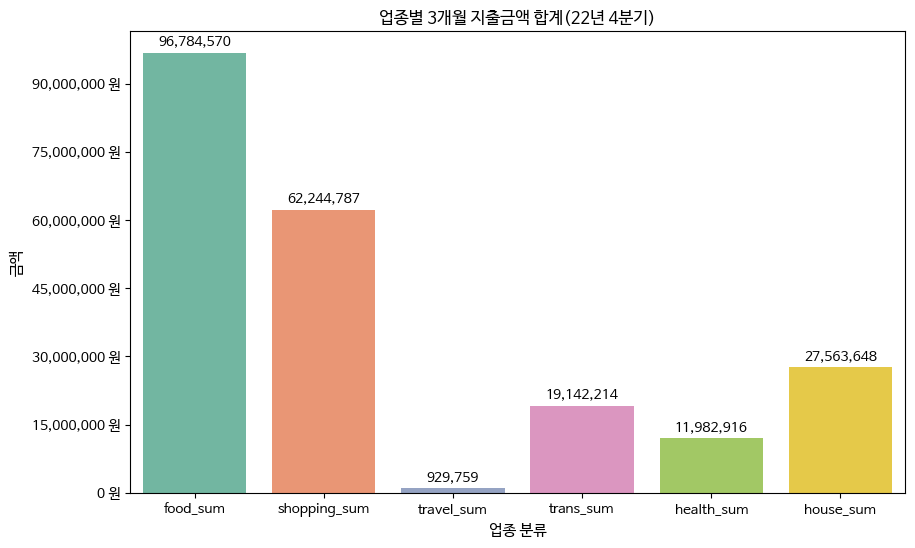

In [28]:
# 컬럼별 합계 계산
category_sums = df_sum_by_cat.sum()

# 시각화
plt.figure(figsize=(10, 6))
# sns.set_palette("Set2")
ax = sns.barplot(x=category_sums.index, y=category_sums.values, palette="Set2", ci=None)

ax.set_title("업종별 3개월 지출금액 합계(22년 4분기)")
ax.set_xlabel("업종 분류", fontsize=11)
ax.set_ylabel("금액", fontsize=11)

# 정확한 수치 표시
for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}", label_type="edge", fontsize=10, padding=3)

# y축 숫자 형식 설정 (일반 숫자 형식으로)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,} 원'))

# y축 정수 설정
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

## 2. 미시적 집계

### 시각화 - `df_amount_food`

In [29]:
df_amount_food

CUST_ID  SEX  AGE  R3M_FOOD_AMT  R3M_ENT_AMT  R3M_MART_AMT  \
0            SYN_0    2   35             0            0             0   
1            SYN_1    2   50             0            0             0   
3            SYN_3    1   25             0            0             0   
4            SYN_4    2   40            93            0             0   
5            SYN_5    2   55           183            0             0   
...            ...  ...  ...           ...          ...           ...   
329994  SYN_329994    1   40           199            0             0   
329995  SYN_329995    1   55             0            0             0   
329996  SYN_329996    2   60             0            0             0   
329998  SYN_329998    2   45             0            0             0   
329999  SYN_329999    1   55           105            0             0   

        R3M_SSM_AMT  R3M_DLV_AMT  R3M_STARBUCKS_AMT  R3M_CONV_AMT  이탈여부  \
0                 0            0                  0             0     0   
1                 0            0                  0             0     0   
3                 0            0                  0             0     0   
4               183          373                  0             0     0   
5               320            0                  0             0     0   
...             ...          ...                ...           ...   ...   
329994          356            0                  0           283     0   
329995            0            0                  0             0     0   
329996            0            0                  0             0     0   
329998            0            0                  0             0     0   
329999           74            0                  0             0     0   

        food_sum  
0              0  
1              0  
3              0  
4            649  
5            503  
...          ...  
329994       838  
329995         0  
329996         0  
329998         0  
329999       179  

[283945 rows x 12 columns]

In [30]:
# 이용금액 컬럼만 추출
df_amount_food_filtered = df_amount_food[df_amount_food.columns[3:10]]
df_amount_food_filtered

R3M_FOOD_AMT  R3M_ENT_AMT  R3M_MART_AMT  R3M_SSM_AMT  R3M_DLV_AMT  \
0                  0            0             0            0            0   
1                  0            0             0            0            0   
3                  0            0             0            0            0   
4                 93            0             0          183          373   
5                183            0             0          320            0   
...              ...          ...           ...          ...          ...   
329994           199            0             0          356            0   
329995             0            0             0            0            0   
329996             0            0             0            0            0   
329998             0            0             0            0            0   
329999           105            0             0           74            0   

        R3M_STARBUCKS_AMT  R3M_CONV_AMT  
0                       0             0  
1                       0             0  
3                       0             0  
4                       0             0  
5                       0             0  
...                   ...           ...  
329994                  0           283  
329995                  0             0  
329996                  0             0  
329998                  0             0  
329999                  0             0  

[283945 rows x 7 columns]

<ipython-input-31-81be67d72787>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_sums.index, y=category_sums.values, palette="Set2", errorbar=None)


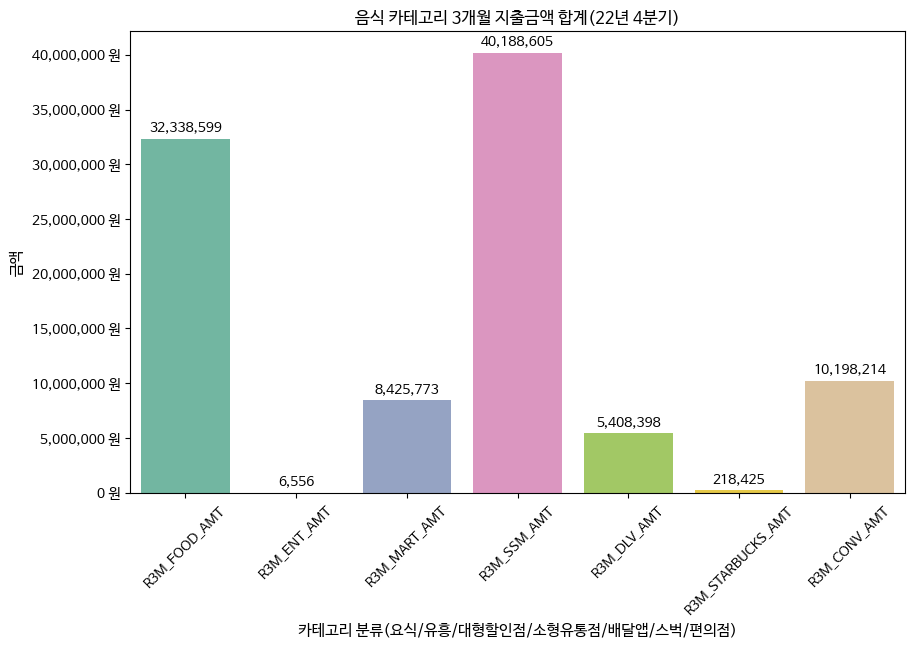

In [31]:
# 컬럼별 합계 계산
category_sums = df_amount_food_filtered.sum()

# 시각화
plt.figure(figsize=(10, 6))
# sns.set_palette("Set2")
ax = sns.barplot(x=category_sums.index, y=category_sums.values, palette="Set2", errorbar=None)

ax.set_title("음식 카테고리 3개월 지출금액 합계(22년 4분기)")
ax.set_xlabel("카테고리 분류(요식/유흥/대형할인점/소형유통점/배달앱/스벅/편의점)", fontsize=11)
ax.set_ylabel("금액", fontsize=11)

# 정확한 수치 표시
for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}", label_type="edge", fontsize=10, padding=3)

# y축 숫자 형식 설정 (일반 숫자 형식으로)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,} 원'))

# y축 정수 설정
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(rotation=45)
plt.show()

##### 여기서 뭐 다시 보려고 했었는데

In [226]:
df_amount_food

CUST_ID  SEX  AGE  R3M_FOOD_AMT  R3M_ENT_AMT  R3M_MART_AMT  \
0            SYN_0    2   35             0            0             0   
1            SYN_1    2   50             0            0             0   
3            SYN_3    1   25             0            0             0   
4            SYN_4    2   40            93            0             0   
5            SYN_5    2   55           183            0             0   
...            ...  ...  ...           ...          ...           ...   
329994  SYN_329994    1   40           199            0             0   
329995  SYN_329995    1   55             0            0             0   
329996  SYN_329996    2   60             0            0             0   
329998  SYN_329998    2   45             0            0             0   
329999  SYN_329999    1   55           105            0             0   

        R3M_SSM_AMT  R3M_DLV_AMT  R3M_STARBUCKS_AMT  R3M_CONV_AMT  이탈여부  \
0                 0            0                  0             0     0   
1                 0            0                  0             0     0   
3                 0            0                  0             0     0   
4               183          373                  0             0     0   
5               320            0                  0             0     0   
...             ...          ...                ...           ...   ...   
329994          356            0                  0           283     0   
329995            0            0                  0             0     0   
329996            0            0                  0             0     0   
329998            0            0                  0             0     0   
329999           74            0                  0             0     0   

        food_sum  
0              0  
1              0  
3              0  
4            649  
5            503  
...          ...  
329994       838  
329995         0  
329996         0  
329998         0  
329999       179  

[283945 rows x 12 columns]

In [237]:
# 연령대, 이용금액, 이탈여부 컬럼 추출
df_amount_food_filtered = df_amount_food[df_amount_food.columns[2:11]]
df_amount_food_filtered.groupby(['AGE', '이탈여부']).sum()

R3M_FOOD_AMT  R3M_ENT_AMT  R3M_MART_AMT  R3M_SSM_AMT  R3M_DLV_AMT  \
AGE 이탈여부                                                                      
20  0           368886          531         20368       239264        97962   
    1            13102           25           448         8853         2911   
25  0          2700885         2358        210004      1957692       759184   
    1           115291          170         10570        89174        28099   
30  0          3801779         1269        560333      3326499      1162902   
    1           226207          126         30011       197160        72763   
35  0          3840621          197        978256      4469793      1038342   
    1           277528            0         72334       313852        65588   
40  0          4602668         1386       1317189      6202412      1053022   
    1           268336            0         83871       366513        48602   
45  0          4268367          165       1272458      5742502       583064   
    1           254795           82         80846       341857        34321   
50  0          4251492           82       1225892      5557597       315222   
    1           227002            0         57412       289352        13113   
55  0          2884005          165        831686      4105787        92980   
    1           174758            0         54864       251734         5364   
60  0          1977924            0        696607      3076955        26970   
    1           116825            0         52298       174633         1823   
65  0          1128526            0        472673      1907785         1890   
    1            48920            0         18577        90269            0   
70  0           761336            0        364029      1425167         4276   
    1            29346            0         15047        53755            0   

          R3M_STARBUCKS_AMT  R3M_CONV_AMT  
AGE 이탈여부                                   
20  0                  5126        143393  
    1                   116          5183  
25  0                 35937       1083991  
    1                  1410         42714  
30  0                 50147       1521454  
    1                  3208         85409  
35  0                 42401       1487177  
    1                  2717         97452  
40  0                 30148       1638627  
    1                  1620         92476  
45  0                 20267       1327943  
    1                   978         72776  
50  0                 13298       1183277  
    1                   555         62633  
55  0                  6333        691454  
    1                   319         39212  
60  0                  2340        372030  
    1                   310         13694  
65  0                   837        164455  
    1                    61          5803  
70  0                   274         65951  
    1                    23          1110

In [248]:
# 연령대 수정
df_amount_food_filtered = df_amount_food_filtered.replace({'AGE' : 25}, 20)
df_amount_food_filtered = df_amount_food_filtered.replace({'AGE' : 35}, 30)
df_amount_food_filtered = df_amount_food_filtered.replace({'AGE' : 45}, 40)
df_amount_food_filtered = df_amount_food_filtered.replace({'AGE' : 55}, 50)
df_amount_food_filtered = df_amount_food_filtered.replace({'AGE' : 65}, 60)
df_amount_food_group = df_amount_food_filtered.groupby(['AGE', '이탈여부']).sum()
df_amount_food_group.index

MultiIndex([(20, 0),
            (20, 1),
            (30, 0),
            (30, 1),
            (40, 0),
            (40, 1),
            (50, 0),
            (50, 1),
            (60, 0),
            (60, 1),
            (70, 0),
            (70, 1)],
           names=['AGE', '이탈여부'])

In [250]:
# 인덱스를 컬럼으로 변환
temp = df_amount_food_group.reset_index().rename(columns={'index': 'AGE'})
temp

# 데이터 변환 (melt 사용 → long-format으로 변환)
temp = temp.melt(id_vars=['연령대'], var_name='카테고리', value_name='소비 비율')

AGE  이탈여부  R3M_FOOD_AMT  R3M_ENT_AMT  R3M_MART_AMT  R3M_SSM_AMT  \
0    20     0       3069771         2889        230372      2196956   
1    20     1        128393          195         11018        98027   
2    30     0       7642400         1466       1538589      7796292   
3    30     1        503735          126        102345       511012   
4    40     0       8871035         1551       2589647     11944914   
5    40     1        523131           82        164717       708370   
6    50     0       7135497          247       2057578      9663384   
7    50     1        401760            0        112276       541086   
8    60     0       3106450            0       1169280      4984740   
9    60     1        165745            0         70875       264902   
10   70     0        761336            0        364029      1425167   
11   70     1         29346            0         15047        53755   

    R3M_DLV_AMT  R3M_STARBUCKS_AMT  R3M_CONV_AMT  
0        857146              41063       1227384  
1         31010               1526         47897  
2       2201244              92548       3008631  
3        138351               5925        182861  
4       1636086              50415       2966570  
5         82923               2598        165252  
6        408202              19631       1874731  
7         18477                874        101845  
8         28860               3177        536485  
9          1823                371         19497  
10         4276                274         65951  
11            0                 23          1110

<ipython-input-246-c5e8c5b021ea>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_sums.index, y=category_sums.values, palette="Set2", errorbar=None)


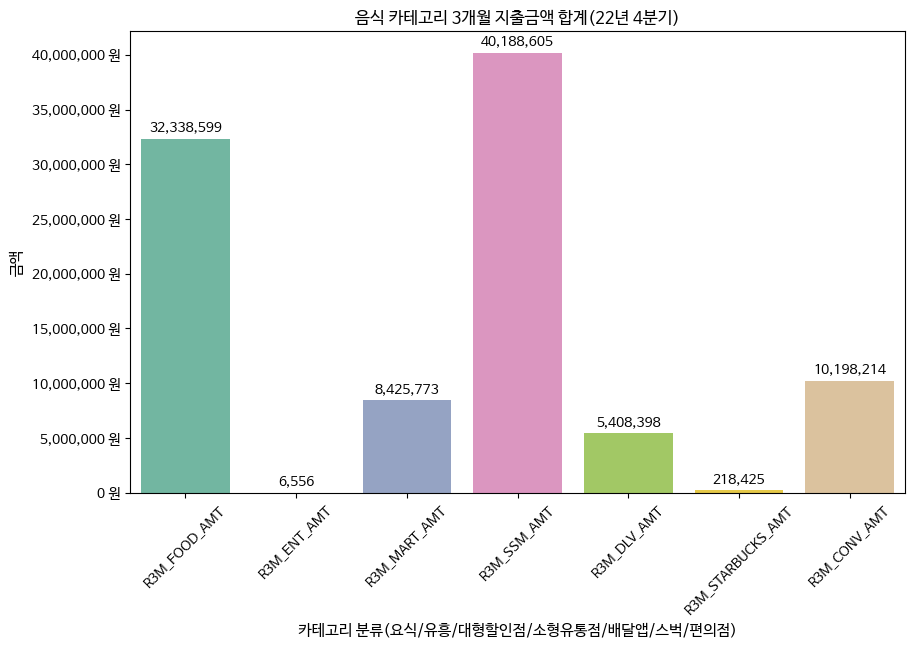

In [246]:
# 컬럼별 합계 계산
category_sums = df_amount_food_group.sum()

# 시각화
plt.figure(figsize=(10, 6))
# sns.set_palette("Set2")
ax = sns.barplot(x=category_sums.index, y=category_sums.values, palette="Set2", errorbar=None)

ax.set_title("음식 카테고리 3개월 지출금액 합계(22년 4분기)")
ax.set_xlabel("카테고리 분류(요식/유흥/대형할인점/소형유통점/배달앱/스벅/편의점)", fontsize=11)
ax.set_ylabel("금액", fontsize=11)

# 정확한 수치 표시
for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}", label_type="edge", fontsize=10, padding=3)

# y축 숫자 형식 설정 (일반 숫자 형식으로)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,} 원'))

# y축 정수 설정
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(rotation=45)
plt.show()

### 시각화 - `df_amount_shopping`

In [32]:
df_amount_shopping

CUST_ID  SEX  AGE  R3M_DEP_AMT  R3M_CLOTHES_AMT  R3M_CUL_AMT  \
0            SYN_0    2   35            0                0            0   
1            SYN_1    2   50          131                0            0   
3            SYN_3    1   25            0                0            0   
4            SYN_4    2   40            0                0            0   
5            SYN_5    2   55            0                0            0   
...            ...  ...  ...          ...              ...          ...   
329994  SYN_329994    1   40            0                0            0   
329995  SYN_329995    1   55            0                0            0   
329996  SYN_329996    2   60            0                0            0   
329998  SYN_329998    2   45            0                0            0   
329999  SYN_329999    1   55            0                0            0   

        R3M_FURN_AMT  R3M_E_COMM_AMT  이탈여부  shopping_sum  
0                  0               0     0             0  
1                  0               0     0           131  
3                  0               0     0             0  
4                  0             819     0           819  
5                  0               0     0             0  
...              ...             ...   ...           ...  
329994             0             421     0           421  
329995             0             309     0           309  
329996             0               0     0             0  
329998             0               0     0             0  
329999             0               0     0             0  

[283945 rows x 10 columns]

In [33]:
# 이용금액 컬럼만 추출
df_amount_shopping_filtered = df_amount_shopping[df_amount_shopping.columns[3:8]]
df_amount_shopping_filtered

R3M_DEP_AMT  R3M_CLOTHES_AMT  R3M_CUL_AMT  R3M_FURN_AMT  \
0                 0                0            0             0   
1               131                0            0             0   
3                 0                0            0             0   
4                 0                0            0             0   
5                 0                0            0             0   
...             ...              ...          ...           ...   
329994            0                0            0             0   
329995            0                0            0             0   
329996            0                0            0             0   
329998            0                0            0             0   
329999            0                0            0             0   

        R3M_E_COMM_AMT  
0                    0  
1                    0  
3                    0  
4                  819  
5                    0  
...                ...  
329994             421  
329995             309  
329996               0  
329998               0  
329999               0  

[283945 rows x 5 columns]

<ipython-input-34-e1795a66182c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_sums.index, y=category_sums.values, palette="Set2", errorbar=None)


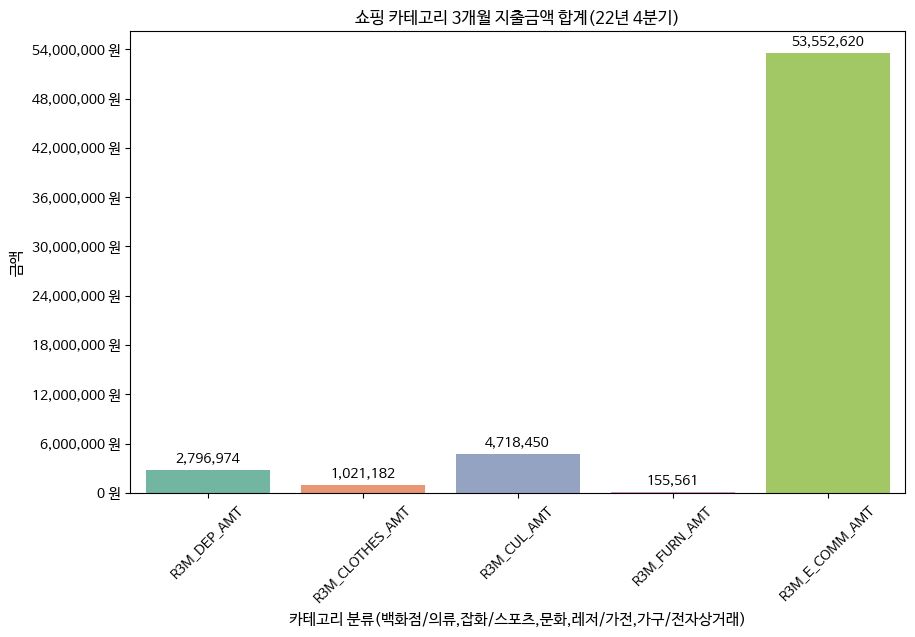

In [34]:
# 컬럼별 합계 계산
category_sums = df_amount_shopping_filtered.sum()

# 시각화
plt.figure(figsize=(10, 6))
# sns.set_palette("Set2")
ax = sns.barplot(x=category_sums.index, y=category_sums.values, palette="Set2", errorbar=None)

ax.set_title("쇼핑 카테고리 3개월 지출금액 합계(22년 4분기)")
ax.set_xlabel("카테고리 분류(백화점/의류,잡화/스포츠,문화,레저/가전,가구/전자상거래)", fontsize=11)
ax.set_ylabel("금액", fontsize=11)

# 정확한 수치 표시
for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}", label_type="edge", fontsize=10, padding=3)

# y축 숫자 형식 설정 (일반 숫자 형식으로)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,} 원'))

# y축 정수 설정
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(rotation=45)
plt.show()

### 시각화 - `df_amount_travel`

In [35]:
df_amount_travel

CUST_ID  SEX  AGE  R3M_ACCO_AMT  R3M_TRAVEL_AMT  R3M_HOTEL_AMT  \
0            SYN_0    2   35             0               0              0   
1            SYN_1    2   50             0               0              0   
3            SYN_3    1   25             0               0              0   
4            SYN_4    2   40             0               0              0   
5            SYN_5    2   55             0               0              0   
...            ...  ...  ...           ...             ...            ...   
329994  SYN_329994    1   40             0               0              0   
329995  SYN_329995    1   55             0               0              0   
329996  SYN_329996    2   60             0               0              0   
329998  SYN_329998    2   45             0               0              0   
329999  SYN_329999    1   55             0               0              0   

        R3M_JJ_AMT  R3M_TRAVEL_OS_AMT  이탈여부  travel_sum  
0                0                  0     0           0  
1                0                  0     0           0  
3                0                  0     0           0  
4                0                  0     0           0  
5                0                  0     0           0  
...            ...                ...   ...         ...  
329994           0                  0     0           0  
329995           0                  0     0           0  
329996           0                  0     0           0  
329998           0                  0     0           0  
329999           0                  0     0           0  

[283945 rows x 10 columns]

In [36]:
# 이용금액 컬럼만 추출
df_amount_travel_filtered = df_amount_travel[df_amount_travel.columns[3:8]]
df_amount_travel_filtered

R3M_ACCO_AMT  R3M_TRAVEL_AMT  R3M_HOTEL_AMT  R3M_JJ_AMT  \
0                  0               0              0           0   
1                  0               0              0           0   
3                  0               0              0           0   
4                  0               0              0           0   
5                  0               0              0           0   
...              ...             ...            ...         ...   
329994             0               0              0           0   
329995             0               0              0           0   
329996             0               0              0           0   
329998             0               0              0           0   
329999             0               0              0           0   

        R3M_TRAVEL_OS_AMT  
0                       0  
1                       0  
3                       0  
4                       0  
5                       0  
...                   ...  
329994                  0  
329995                  0  
329996                  0  
329998                  0  
329999                  0  

[283945 rows x 5 columns]

<ipython-input-37-7876e254cb4a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_sums.index, y=category_sums.values, palette="Set2", errorbar=None)


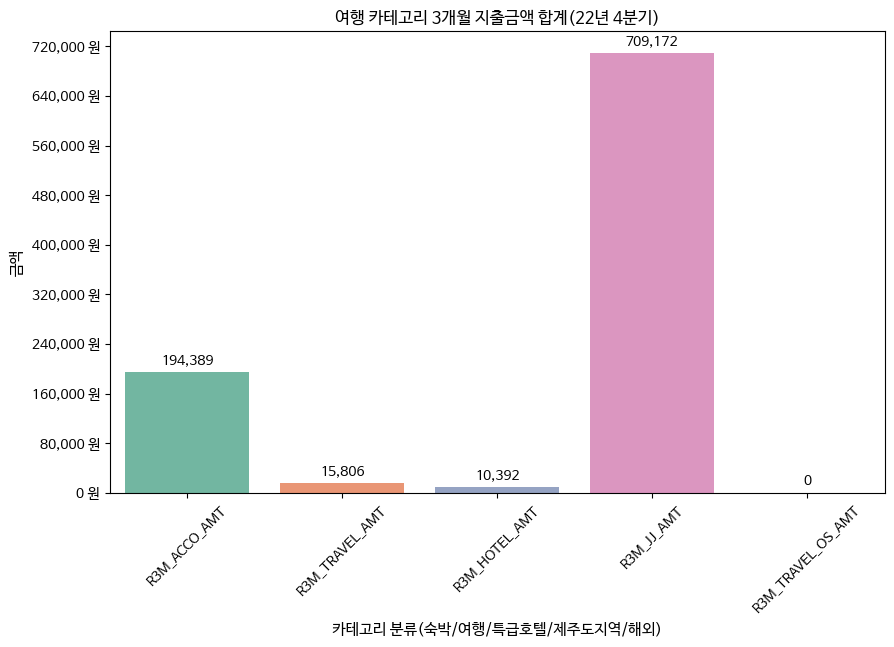

In [37]:
# 컬럼별 합계 계산
category_sums = df_amount_travel_filtered.sum()

# 시각화
plt.figure(figsize=(10, 6))
# sns.set_palette("Set2")
ax = sns.barplot(x=category_sums.index, y=category_sums.values, palette="Set2", errorbar=None)

ax.set_title("여행 카테고리 3개월 지출금액 합계(22년 4분기)")
ax.set_xlabel("카테고리 분류(숙박/여행/특급호텔/제주도지역/해외)", fontsize=11)
ax.set_ylabel("금액", fontsize=11)

# 정확한 수치 표시
for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}", label_type="edge", fontsize=10, padding=3)

# y축 숫자 형식 설정 (일반 숫자 형식으로)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,} 원'))

# y축 정수 설정
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(rotation=45)
plt.show()

### 시각화 - df_amount_trans

In [38]:
df_amount_trans

CUST_ID  SEX  AGE  R3M_TRANS_AMT  R3M_CAR_AMT  R3M_CAR_SERVICE_AMT  \
0            SYN_0    2   35              0            0                    0   
1            SYN_1    2   50              0            0                    0   
3            SYN_3    1   25              0            0                    0   
4            SYN_4    2   40              0            0                    0   
5            SYN_5    2   55              0            0                    0   
...            ...  ...  ...            ...          ...                  ...   
329994  SYN_329994    1   40             47            0                    0   
329995  SYN_329995    1   55             59            0                    0   
329996  SYN_329996    2   60              0            0                    0   
329998  SYN_329998    2   45              0            0                    0   
329999  SYN_329999    1   55              0            0                    0   

        R3M_OIL_AMT  R3M_E_CHARGE_AMT  이탈여부  trans_sum  
0                 0                 0     0          0  
1                 0                 0     0          0  
3                 0                 0     0          0  
4                 0                 0     0          0  
5               298                 0     0        298  
...             ...               ...   ...        ...  
329994          235                 0     0        282  
329995            0                 0     0         59  
329996            0                 0     0          0  
329998            0                 0     0          0  
329999            0                 0     0          0  

[283945 rows x 10 columns]

In [39]:
# 이용금액 컬럼만 추출
df_amount_trans_filtered = df_amount_trans[df_amount_trans.columns[3:8]]
df_amount_trans_filtered

R3M_TRANS_AMT  R3M_CAR_AMT  R3M_CAR_SERVICE_AMT  R3M_OIL_AMT  \
0                   0            0                    0            0   
1                   0            0                    0            0   
3                   0            0                    0            0   
4                   0            0                    0            0   
5                   0            0                    0          298   
...               ...          ...                  ...          ...   
329994             47            0                    0          235   
329995             59            0                    0            0   
329996              0            0                    0            0   
329998              0            0                    0            0   
329999              0            0                    0            0   

        R3M_E_CHARGE_AMT  
0                      0  
1                      0  
3                      0  
4                      0  
5                      0  
...                  ...  
329994                 0  
329995                 0  
329996                 0  
329998                 0  
329999                 0  

[283945 rows x 5 columns]

<ipython-input-40-56bc5aec790a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_sums.index, y=category_sums.values, palette="Set2", errorbar=None)


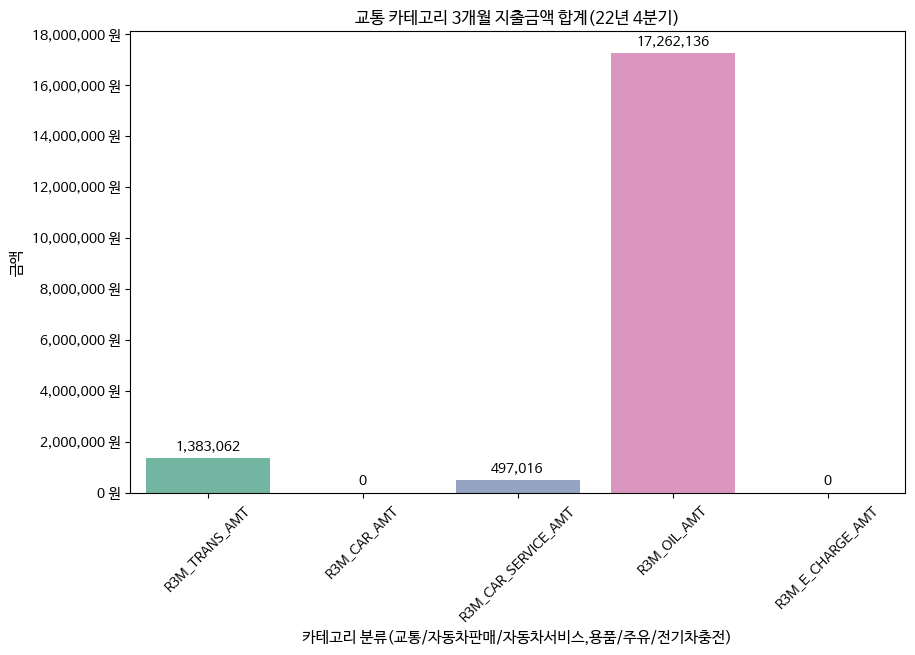

In [40]:
# 컬럼별 합계 계산
category_sums = df_amount_trans_filtered.sum()

# 시각화
plt.figure(figsize=(10, 6))
# sns.set_palette("Set2")
ax = sns.barplot(x=category_sums.index, y=category_sums.values, palette="Set2", errorbar=None)

ax.set_title("교통 카테고리 3개월 지출금액 합계(22년 4분기)")
ax.set_xlabel("카테고리 분류(교통/자동차판매/자동차서비스,용품/주유/전기차충전)", fontsize=11)
ax.set_ylabel("금액", fontsize=11)

# 정확한 수치 표시
for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}", label_type="edge", fontsize=10, padding=3)

# y축 숫자 형식 설정 (일반 숫자 형식으로)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,} 원'))

# y축 정수 설정
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(rotation=45)
plt.show()

### 시각화 - `df_amount_health`

In [41]:
df_amount_health

CUST_ID  SEX  AGE  R3M_BEAUTY_AMT  R3M_MED_AMT  이탈여부  health_sum
0            SYN_0    2   35               0            0     0           0
1            SYN_1    2   50               0            0     0           0
3            SYN_3    1   25               0            0     0           0
4            SYN_4    2   40               0            0     0           0
5            SYN_5    2   55               0          202     0         202
...            ...  ...  ...             ...          ...   ...         ...
329994  SYN_329994    1   40               0           83     0          83
329995  SYN_329995    1   55               0            0     0           0
329996  SYN_329996    2   60               0            0     0           0
329998  SYN_329998    2   45               0            0     0           0
329999  SYN_329999    1   55               0            0     0           0

[283945 rows x 7 columns]

In [42]:
# 이용금액 컬럼만 추출
df_amount_health_filtered = df_amount_health[df_amount_health.columns[3:5]]
df_amount_health_filtered

R3M_BEAUTY_AMT  R3M_MED_AMT
0                    0            0
1                    0            0
3                    0            0
4                    0            0
5                    0          202
...                ...          ...
329994               0           83
329995               0            0
329996               0            0
329998               0            0
329999               0            0

[283945 rows x 2 columns]

<ipython-input-43-1c2b090586f6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_sums.index, y=category_sums.values, palette="Set2", errorbar=None)


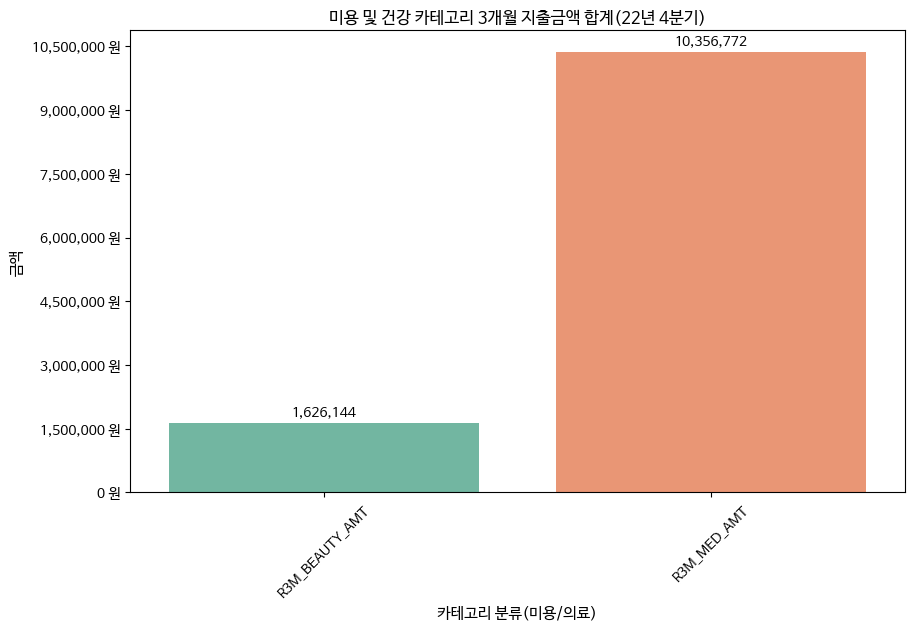

In [43]:
# 컬럼별 합계 계산
category_sums = df_amount_health_filtered.sum()

# 시각화
plt.figure(figsize=(10, 6))
# sns.set_palette("Set2")
ax = sns.barplot(x=category_sums.index, y=category_sums.values, palette="Set2", errorbar=None)

ax.set_title("미용 및 건강 카테고리 3개월 지출금액 합계(22년 4분기)")
ax.set_xlabel("카테고리 분류(미용/의료)", fontsize=11)
ax.set_ylabel("금액", fontsize=11)

# 정확한 수치 표시
for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}", label_type="edge", fontsize=10, padding=3)

# y축 숫자 형식 설정 (일반 숫자 형식으로)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,} 원'))

# y축 정수 설정
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(rotation=45)
plt.show()

### 시각화 - `df_amount_house`

In [44]:
df_amount_house

CUST_ID  SEX  AGE  R3M_HOUSEHOLD_AMT  R3M_EDU_AMT  이탈여부  house_sum
0            SYN_0    2   35                  0            0     0          0
1            SYN_1    2   50                  0            0     0          0
3            SYN_3    1   25                  0            0     0          0
4            SYN_4    2   40                  0            0     0          0
5            SYN_5    2   55                369            0     0        369
...            ...  ...  ...                ...          ...   ...        ...
329994  SYN_329994    1   40                  0            0     0          0
329995  SYN_329995    1   55                198            0     0        198
329996  SYN_329996    2   60                  0            0     0          0
329998  SYN_329998    2   45                482            0     0        482
329999  SYN_329999    1   55                  0            0     0          0

[283945 rows x 7 columns]

In [45]:
# 이용금액 컬럼만 추출
df_amount_house_filtered = df_amount_house[df_amount_house.columns[3:5]]
df_amount_house_filtered

R3M_HOUSEHOLD_AMT  R3M_EDU_AMT
0                       0            0
1                       0            0
3                       0            0
4                       0            0
5                     369            0
...                   ...          ...
329994                  0            0
329995                198            0
329996                  0            0
329998                482            0
329999                  0            0

[283945 rows x 2 columns]

<ipython-input-46-b70ca96ddf1e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_sums.index, y=category_sums.values, palette="Set2", errorbar=None)


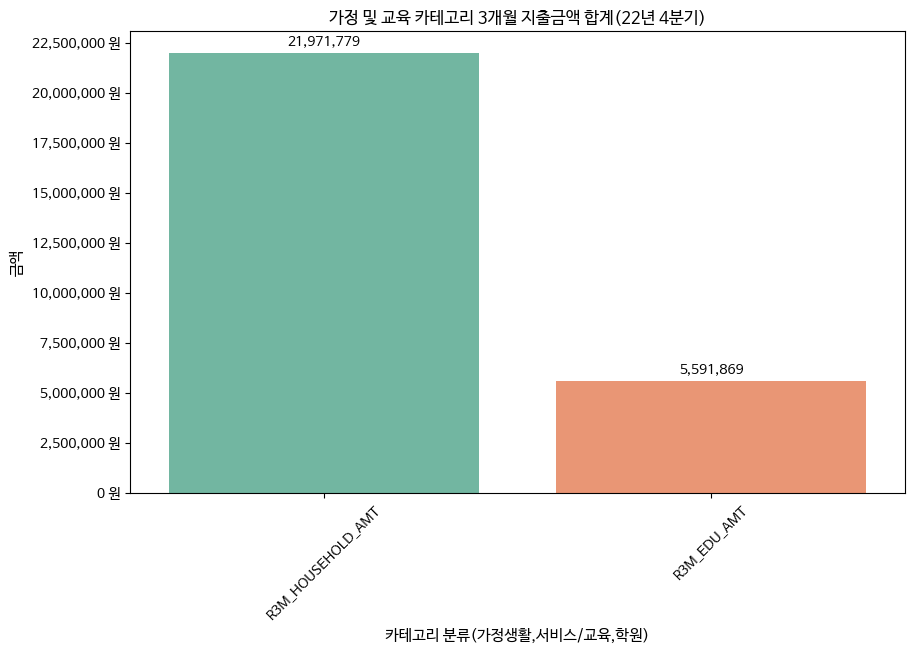

In [46]:
# 컬럼별 합계 계산
category_sums = df_amount_house_filtered.sum()

# 시각화
plt.figure(figsize=(10, 6))
# sns.set_palette("Set2")
ax = sns.barplot(x=category_sums.index, y=category_sums.values, palette="Set2", errorbar=None)

ax.set_title("가정 및 교육 카테고리 3개월 지출금액 합계(22년 4분기)")
ax.set_xlabel("카테고리 분류(가정생활,서비스/교육,학원)", fontsize=11)
ax.set_ylabel("금액", fontsize=11)

# 정확한 수치 표시
for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}", label_type="edge", fontsize=10, padding=3)

# y축 숫자 형식 설정 (일반 숫자 형식으로)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,} 원'))

# y축 정수 설정
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(rotation=45)
plt.show()

# 상관관계 분석

## 성별 & 연령대 & 업종별 이용금액합계 & 이탈여부

In [47]:
# 이거 아직 안 씀
df_sex_age_tot_exit = pd.concat([
    df_amount.iloc[:, 1:3],
    df_amount.iloc[:, -1],
    df_amount_food.iloc[:, -1],
    df_amount_shopping.iloc[:, -1],
    df_amount_travel.iloc[:, -1],
    df_amount_trans.iloc[:, -1],
    df_amount_health.iloc[:, -1],
    df_amount_house.iloc[:, -1]], axis=1)

df_sex_age_tot_exit

SEX  AGE  이탈여부  food_sum  shopping_sum  travel_sum  trans_sum  \
0         2   35     0         0             0           0          0   
1         2   50     0         0           131           0          0   
3         1   25     0         0             0           0          0   
4         2   40     0       649           819           0          0   
5         2   55     0       503             0           0        298   
...     ...  ...   ...       ...           ...         ...        ...   
329994    1   40     0       838           421           0        282   
329995    1   55     0         0           309           0         59   
329996    2   60     0         0             0           0          0   
329998    2   45     0         0             0           0          0   
329999    1   55     0       179             0           0          0   

        health_sum  house_sum  
0                0          0  
1                0          0  
3                0          0  
4                0          0  
5              202        369  
...            ...        ...  
329994          83          0  
329995           0        198  
329996           0          0  
329998           0        482  
329999           0          0  

[283945 rows x 9 columns]

# 이탈고객의 분포/비율

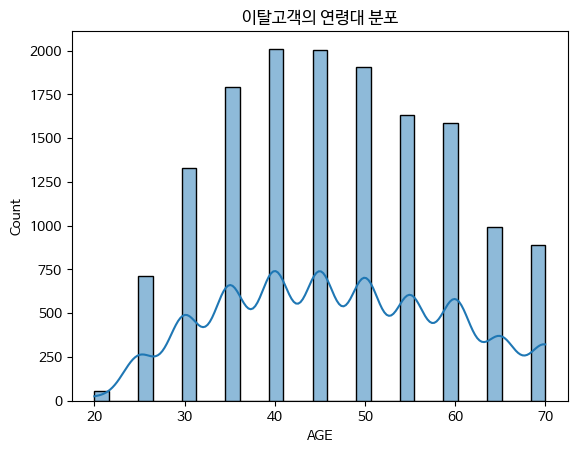

In [48]:
# 이탈고객의 연령대 분포
df_exited = df_amount[df_amount['이탈여부'] == 1]

sns.histplot(
    df_exited,
    x='AGE',
    kde=True
).set(title='이탈고객의 연령대 분포')

plt.show()

In [49]:
# 각 연령대의 카테고리별 지출 비율
df_amount_food[df_amount_food['이탈여부'] == 1]

CUST_ID  SEX  AGE  R3M_FOOD_AMT  R3M_ENT_AMT  R3M_MART_AMT  \
12          SYN_12    2   40             0            0             0   
17          SYN_17    2   30             0            0             0   
21          SYN_21    1   40           390            0            62   
29          SYN_29    1   50             0            0             0   
38          SYN_38    2   45            93            0           706   
...            ...  ...  ...           ...          ...           ...   
329822  SYN_329822    1   70             0            0             0   
329857  SYN_329857    1   35           667            0             0   
329863  SYN_329863    1   50             0            0             0   
329968  SYN_329968    1   65           165            0             0   
329973  SYN_329973    2   35             0            0             0   

        R3M_SSM_AMT  R3M_DLV_AMT  R3M_STARBUCKS_AMT  R3M_CONV_AMT  이탈여부  \
12                0            0                  0             0     1   
17                0            0                  0             0     1   
21              243            0                  0            45     1   
29                0            0                  0             0     1   
38              362            0                  0             0     1   
...             ...          ...                ...           ...   ...   
329822            0            0                  0             0     1   
329857          424            0                  0           286     1   
329863            0            0                  0             0     1   
329968           71            0                  0             0     1   
329973            0            0                  0             0     1   

        food_sum  
12             0  
17             0  
21           740  
29             0  
38          1161  
...          ...  
329822         0  
329857      1377  
329863         0  
329968       236  
329973         0  

[14908 rows x 12 columns]

## 01 카테고리별 이탈고객 dataframe 생성

In [50]:
df_food_exited = df_amount_food[df_amount_food['이탈여부'] == 1]
df_shopping_exited = df_amount_shopping[df_amount_shopping['이탈여부'] == 1]
df_travel_exited = df_amount_travel[df_amount_travel['이탈여부'] == 1]
df_trans_exited = df_amount_trans[df_amount_trans['이탈여부'] == 1]
df_health_exited = df_amount_health[df_amount_health['이탈여부'] == 1]
df_house_exited = df_amount_house[df_amount_house['이탈여부'] == 1]

In [51]:
df_food_exited

CUST_ID  SEX  AGE  R3M_FOOD_AMT  R3M_ENT_AMT  R3M_MART_AMT  \
12          SYN_12    2   40             0            0             0   
17          SYN_17    2   30             0            0             0   
21          SYN_21    1   40           390            0            62   
29          SYN_29    1   50             0            0             0   
38          SYN_38    2   45            93            0           706   
...            ...  ...  ...           ...          ...           ...   
329822  SYN_329822    1   70             0            0             0   
329857  SYN_329857    1   35           667            0             0   
329863  SYN_329863    1   50             0            0             0   
329968  SYN_329968    1   65           165            0             0   
329973  SYN_329973    2   35             0            0             0   

        R3M_SSM_AMT  R3M_DLV_AMT  R3M_STARBUCKS_AMT  R3M_CONV_AMT  이탈여부  \
12                0            0                  0             0     1   
17                0            0                  0             0     1   
21              243            0                  0            45     1   
29                0            0                  0             0     1   
38              362            0                  0             0     1   
...             ...          ...                ...           ...   ...   
329822            0            0                  0             0     1   
329857          424            0                  0           286     1   
329863            0            0                  0             0     1   
329968           71            0                  0             0     1   
329973            0            0                  0             0     1   

        food_sum  
12             0  
17             0  
21           740  
29             0  
38          1161  
...          ...  
329822         0  
329857      1377  
329863         0  
329968       236  
329973         0  

[14908 rows x 12 columns]

In [52]:
df_shopping_exited

CUST_ID  SEX  AGE  R3M_DEP_AMT  R3M_CLOTHES_AMT  R3M_CUL_AMT  \
12          SYN_12    2   40            0                0            0   
17          SYN_17    2   30            0                0            0   
21          SYN_21    1   40            0                0          108   
29          SYN_29    1   50            0                0            0   
38          SYN_38    2   45            0                0            0   
...            ...  ...  ...          ...              ...          ...   
329822  SYN_329822    1   70            0                0            0   
329857  SYN_329857    1   35            0                0           77   
329863  SYN_329863    1   50            0                0            0   
329968  SYN_329968    1   65            0                0            0   
329973  SYN_329973    2   35            0                0            0   

        R3M_FURN_AMT  R3M_E_COMM_AMT  이탈여부  shopping_sum  
12                 0               0     1             0  
17                 0               0     1             0  
21                 0               0     1           108  
29                 0               0     1             0  
38                 0             322     1           322  
...              ...             ...   ...           ...  
329822             0               0     1             0  
329857             0             802     1           879  
329863             0               0     1             0  
329968             0               0     1             0  
329973             0               0     1             0  

[14908 rows x 10 columns]

In [53]:
df_travel_exited

CUST_ID  SEX  AGE  R3M_ACCO_AMT  R3M_TRAVEL_AMT  R3M_HOTEL_AMT  \
12          SYN_12    2   40             0               0              0   
17          SYN_17    2   30             0               0              0   
21          SYN_21    1   40             0               0              0   
29          SYN_29    1   50             0               0              0   
38          SYN_38    2   45             0               0              0   
...            ...  ...  ...           ...             ...            ...   
329822  SYN_329822    1   70             0               0              0   
329857  SYN_329857    1   35             0               0              0   
329863  SYN_329863    1   50             0               0              0   
329968  SYN_329968    1   65             0               0              0   
329973  SYN_329973    2   35             0               0              0   

        R3M_JJ_AMT  R3M_TRAVEL_OS_AMT  이탈여부  travel_sum  
12               0                  0     1           0  
17               0                  0     1           0  
21               0                  0     1           0  
29               0                  0     1           0  
38               0                  0     1           0  
...            ...                ...   ...         ...  
329822           0                  0     1           0  
329857           0                  0     1           0  
329863           0                  0     1           0  
329968           0                  0     1           0  
329973           0                  0     1           0  

[14908 rows x 10 columns]

In [54]:
df_trans_exited

CUST_ID  SEX  AGE  R3M_TRANS_AMT  R3M_CAR_AMT  R3M_CAR_SERVICE_AMT  \
12          SYN_12    2   40              0            0                    0   
17          SYN_17    2   30              0            0                    0   
21          SYN_21    1   40             44            0                    0   
29          SYN_29    1   50              0            0                    0   
38          SYN_38    2   45              0            0                    0   
...            ...  ...  ...            ...          ...                  ...   
329822  SYN_329822    1   70              0            0                    0   
329857  SYN_329857    1   35             56            0                    0   
329863  SYN_329863    1   50              0            0                    0   
329968  SYN_329968    1   65              0            0                    0   
329973  SYN_329973    2   35              0            0                    0   

        R3M_OIL_AMT  R3M_E_CHARGE_AMT  이탈여부  trans_sum  
12                0                 0     1          0  
17                0                 0     1          0  
21              268                 0     1        312  
29                0                 0     1          0  
38                0                 0     1          0  
...             ...               ...   ...        ...  
329822            0                 0     1          0  
329857          244                 0     1        300  
329863            0                 0     1          0  
329968            0                 0     1          0  
329973            0                 0     1          0  

[14908 rows x 10 columns]

In [55]:
df_health_exited

CUST_ID  SEX  AGE  R3M_BEAUTY_AMT  R3M_MED_AMT  이탈여부  health_sum
12          SYN_12    2   40               0            0     1           0
17          SYN_17    2   30               0            0     1           0
21          SYN_21    1   40               0          106     1         106
29          SYN_29    1   50               0            0     1           0
38          SYN_38    2   45               0          213     1         213
...            ...  ...  ...             ...          ...   ...         ...
329822  SYN_329822    1   70               0            0     1           0
329857  SYN_329857    1   35              46           78     1         124
329863  SYN_329863    1   50               0            0     1           0
329968  SYN_329968    1   65               0            0     1           0
329973  SYN_329973    2   35               0            0     1           0

[14908 rows x 7 columns]

In [56]:
df_house_exited

CUST_ID  SEX  AGE  R3M_HOUSEHOLD_AMT  R3M_EDU_AMT  이탈여부  house_sum
12          SYN_12    2   40                  0            0     1          0
17          SYN_17    2   30                  0            0     1          0
21          SYN_21    1   40                300            0     1        300
29          SYN_29    1   50                  0            0     1          0
38          SYN_38    2   45                186            0     1        186
...            ...  ...  ...                ...          ...   ...        ...
329822  SYN_329822    1   70                  0            0     1          0
329857  SYN_329857    1   35                152            0     1        152
329863  SYN_329863    1   50                  0            0     1          0
329968  SYN_329968    1   65                  0            0     1          0
329973  SYN_329973    2   35                  0            0     1          0

[14908 rows x 7 columns]

In [168]:
# AGE로 그룹화, food_sum의 합계
df_food_temp = df_food_exited.groupby('AGE')['food_sum'].sum()
df_food_temp

AGE
20     30638
25    287428
30    614884
35    829471
40    861418
45    785655
50    650067
55    526251
60    359583
65    163630
70     99281
Name: food_sum, dtype: int64

In [58]:
# AGE로 그룹화, shopping_sum의 합계
df_shopping_temp = df_shopping_exited.groupby('AGE')['shopping_sum'].sum()
df_shopping_temp

AGE
20     21358
25    210249
30    474752
35    636994
40    613699
45    578896
50    375859
55    245330
60    147914
65     59942
70     24101
Name: shopping_sum, dtype: int64

In [59]:
# AGE로 그룹화, travel_sum의 합계
df_travel_temp = df_travel_exited.groupby('AGE')['travel_sum'].sum()
df_travel_temp

AGE
20        0
25     2748
30     3741
35     7303
40    10006
45     7525
50     2483
55     5044
60     1964
65      235
70     1557
Name: travel_sum, dtype: int64

In [60]:
# AGE로 그룹화, trans_sum의 합계
df_trans_temp = df_trans_exited.groupby('AGE')['trans_sum'].sum()
df_trans_temp

AGE
20      1864
25     34374
30     82924
35    130440
40    128163
45    130209
50    134301
55    121016
60    117015
65     60487
70     43374
Name: trans_sum, dtype: int64

In [61]:
# AGE로 그룹화, health_sum의 합계
df_health_temp = df_health_exited.groupby('AGE')['health_sum'].sum()
df_health_temp

AGE
20     2634
25    19658
30    45648
35    76617
40    89570
45    97879
50    83361
55    74763
60    68054
65    39062
70    35815
Name: health_sum, dtype: int64

In [62]:
# AGE로 그룹화, house_sum의 합계
df_house_temp = df_house_exited.groupby('AGE')['house_sum'].sum()
df_house_temp

AGE
20      3435
25     41340
30    112277
35    213091
40    288580
45    280151
50    192481
55    128679
60    116501
65     59876
70     35808
Name: house_sum, dtype: int64

In [63]:
# AGE를 기준으로 각 연령대의 카테고리별 이용금액합계 테이블 합성
df_cat_age = pd.merge(df_food_temp, df_shopping_temp, on='AGE')
df_cat_age = pd.merge(df_cat_age, df_travel_temp, on='AGE')
df_cat_age = pd.merge(df_cat_age, df_trans_temp, on='AGE')
df_cat_age = pd.merge(df_cat_age, df_health_temp, on='AGE')
df_cat_age = pd.merge(df_cat_age, df_house_temp, on='AGE')

In [64]:
df_cat_age

food_sum  shopping_sum  travel_sum  trans_sum  health_sum  house_sum
AGE                                                                      
20      30638         21358           0       1864        2634       3435
25     287428        210249        2748      34374       19658      41340
30     614884        474752        3741      82924       45648     112277
35     829471        636994        7303     130440       76617     213091
40     861418        613699       10006     128163       89570     288580
45     785655        578896        7525     130209       97879     280151
50     650067        375859        2483     134301       83361     192481
55     526251        245330        5044     121016       74763     128679
60     359583        147914        1964     117015       68054     116501
65     163630         59942         235      60487       39062      59876
70      99281         24101        1557      43374       35815      35808

In [65]:
# age 컬럼 추가, AGE 기준으로 그룹화 할 예정
df_cat_age['age'] = [20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70]
df_cat_age

food_sum  shopping_sum  travel_sum  trans_sum  health_sum  house_sum  age
AGE                                                                           
20      30638         21358           0       1864        2634       3435   20
25     287428        210249        2748      34374       19658      41340   20
30     614884        474752        3741      82924       45648     112277   30
35     829471        636994        7303     130440       76617     213091   30
40     861418        613699       10006     128163       89570     288580   40
45     785655        578896        7525     130209       97879     280151   40
50     650067        375859        2483     134301       83361     192481   50
55     526251        245330        5044     121016       74763     128679   50
60     359583        147914        1964     117015       68054     116501   60
65     163630         59942         235      60487       39062      59876   60
70      99281         24101        1557      43374       35815      35808   70

In [66]:
# 연령대별 카테고리의 이용금액합계 테이블 생성
df_cat_age = df_cat_age.groupby('age').sum()
df_cat_age

food_sum  shopping_sum  travel_sum  trans_sum  health_sum  house_sum
age                                                                      
20     318066        231607        2748      36238       22292      44775
30    1444355       1111746       11044     213364      122265     325368
40    1647073       1192595       17531     258372      187449     568731
50    1176318        621189        7527     255317      158124     321160
60     523213        207856        2199     177502      107116     176377
70      99281         24101        1557      43374       35815      35808

In [67]:
df_cat_age.sum()

food_sum        5208306
shopping_sum    3389094
travel_sum        42606
trans_sum        984167
health_sum       633061
house_sum       1472219
dtype: int64

In [68]:
# 백분율 전환
df_cat_age_ratio = df_cat_age.div(df_cat_age.sum()) * 100
df_cat_age_ratio = df_cat_age_ratio.round(2)
df_cat_age_ratio

food_sum  shopping_sum  travel_sum  trans_sum  health_sum  house_sum
age                                                                      
20       6.11          6.83        6.45       3.68        3.52       3.04
30      27.73         32.80       25.92      21.68       19.31      22.10
40      31.62         35.19       41.15      26.25       29.61      38.63
50      22.59         18.33       17.67      25.94       24.98      21.81
60      10.05          6.13        5.16      18.04       16.92      11.98
70       1.91          0.71        3.65       4.41        5.66       2.43

In [69]:
df_cat_age_ratio.sum()

food_sum        100.01
shopping_sum     99.99
travel_sum      100.00
trans_sum       100.00
health_sum      100.00
house_sum        99.99
dtype: float64

## heatmap: 카테고리별 연령대의 이용금액비율

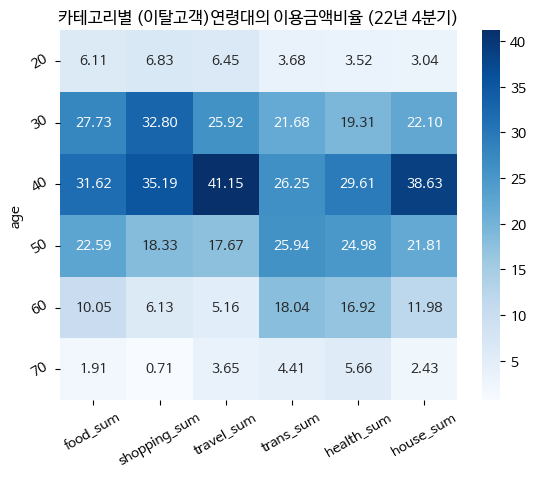

In [189]:
sns.heatmap(df_cat_age_ratio, cmap='Blues', annot=True, fmt=".2f")
plt.title('카테고리별 (이탈고객)연령대의 이용금액비율 (22년 4분기)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

## 02 카테고리 세부항목별 이탈고객 dataframe 생성
- 카테고리 세부항목의 연령대별 비율 보기

In [71]:
df_food_exited_age = df_food_exited.iloc[:, 2:10]
df_shopping_exited_age = df_shopping_exited.iloc[:, 2:8]
df_travel_exited_age = df_travel_exited.iloc[:, 2:8]
df_trans_exited_age = df_trans_exited.iloc[:, 2:8]
df_health_exited_age = df_health_exited.iloc[:, 2:5]
df_house_exited_age = df_house_exited.iloc[:, 2:5]

In [72]:
df_food_exited_age

AGE  R3M_FOOD_AMT  R3M_ENT_AMT  R3M_MART_AMT  R3M_SSM_AMT  \
12       40             0            0             0            0   
17       30             0            0             0            0   
21       40           390            0            62          243   
29       50             0            0             0            0   
38       45            93            0           706          362   
...     ...           ...          ...           ...          ...   
329822   70             0            0             0            0   
329857   35           667            0             0          424   
329863   50             0            0             0            0   
329968   65           165            0             0           71   
329973   35             0            0             0            0   

        R3M_DLV_AMT  R3M_STARBUCKS_AMT  R3M_CONV_AMT  
12                0                  0             0  
17                0                  0             0  
21                0                  0            45  
29                0                  0             0  
38                0                  0             0  
...             ...                ...           ...  
329822            0                  0             0  
329857            0                  0           286  
329863            0                  0             0  
329968            0                  0             0  
329973            0                  0             0  

[14908 rows x 8 columns]

In [73]:
df_shopping_exited_age

AGE  R3M_DEP_AMT  R3M_CLOTHES_AMT  R3M_CUL_AMT  R3M_FURN_AMT  \
12       40            0                0            0             0   
17       30            0                0            0             0   
21       40            0                0          108             0   
29       50            0                0            0             0   
38       45            0                0            0             0   
...     ...          ...              ...          ...           ...   
329822   70            0                0            0             0   
329857   35            0                0           77             0   
329863   50            0                0            0             0   
329968   65            0                0            0             0   
329973   35            0                0            0             0   

        R3M_E_COMM_AMT  
12                   0  
17                   0  
21                   0  
29                   0  
38                 322  
...                ...  
329822               0  
329857             802  
329863               0  
329968               0  
329973               0  

[14908 rows x 6 columns]

In [74]:
df_travel_exited_age

AGE  R3M_ACCO_AMT  R3M_TRAVEL_AMT  R3M_HOTEL_AMT  R3M_JJ_AMT  \
12       40             0               0              0           0   
17       30             0               0              0           0   
21       40             0               0              0           0   
29       50             0               0              0           0   
38       45             0               0              0           0   
...     ...           ...             ...            ...         ...   
329822   70             0               0              0           0   
329857   35             0               0              0           0   
329863   50             0               0              0           0   
329968   65             0               0              0           0   
329973   35             0               0              0           0   

        R3M_TRAVEL_OS_AMT  
12                      0  
17                      0  
21                      0  
29                      0  
38                      0  
...                   ...  
329822                  0  
329857                  0  
329863                  0  
329968                  0  
329973                  0  

[14908 rows x 6 columns]

In [75]:
df_trans_exited_age

AGE  R3M_TRANS_AMT  R3M_CAR_AMT  R3M_CAR_SERVICE_AMT  R3M_OIL_AMT  \
12       40              0            0                    0            0   
17       30              0            0                    0            0   
21       40             44            0                    0          268   
29       50              0            0                    0            0   
38       45              0            0                    0            0   
...     ...            ...          ...                  ...          ...   
329822   70              0            0                    0            0   
329857   35             56            0                    0          244   
329863   50              0            0                    0            0   
329968   65              0            0                    0            0   
329973   35              0            0                    0            0   

        R3M_E_CHARGE_AMT  
12                     0  
17                     0  
21                     0  
29                     0  
38                     0  
...                  ...  
329822                 0  
329857                 0  
329863                 0  
329968                 0  
329973                 0  

[14908 rows x 6 columns]

In [76]:
df_health_exited_age

AGE  R3M_BEAUTY_AMT  R3M_MED_AMT
12       40               0            0
17       30               0            0
21       40               0          106
29       50               0            0
38       45               0          213
...     ...             ...          ...
329822   70               0            0
329857   35              46           78
329863   50               0            0
329968   65               0            0
329973   35               0            0

[14908 rows x 3 columns]

In [77]:
df_house_exited_age

AGE  R3M_HOUSEHOLD_AMT  R3M_EDU_AMT
12       40                  0            0
17       30                  0            0
21       40                300            0
29       50                  0            0
38       45                186            0
...     ...                ...          ...
329822   70                  0            0
329857   35                152            0
329863   50                  0            0
329968   65                  0            0
329973   35                  0            0

[14908 rows x 3 columns]

In [78]:
# 1차 그룹화
df_food_exited_age = df_food_exited_age.groupby('AGE').sum()
# 연령대별 그룹화를 위한 컬럼 추가
df_food_exited_age['age'] = [20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70]
# 2차 그룹화
df_food_exited_age = df_food_exited_age.groupby('age').sum()

df_food_exited_age

R3M_FOOD_AMT  R3M_ENT_AMT  R3M_MART_AMT  R3M_SSM_AMT  R3M_DLV_AMT  \
age                                                                      
20         128393          195         11018        98027        31010   
30         503735          126        102345       511012       138351   
40         523131           82        164717       708370        82923   
50         401760            0        112276       541086        18477   
60         165745            0         70875       264902         1823   
70          29346            0         15047        53755            0   

     R3M_STARBUCKS_AMT  R3M_CONV_AMT  
age                                   
20                1526         47897  
30                5925        182861  
40                2598        165252  
50                 874        101845  
60                 371         19497  
70                  23          1110

In [79]:
# 나머지 dataframe도 동일 작업

# 1차 그룹화
df_shopping_exited_age = df_shopping_exited_age.groupby('AGE').sum()
df_travel_exited_age = df_travel_exited_age.groupby('AGE').sum()
df_trans_exited_age = df_trans_exited_age.groupby('AGE').sum()
df_health_exited_age = df_health_exited_age.groupby('AGE').sum()
df_house_exited_age = df_house_exited_age.groupby('AGE').sum()

# 연령대별 그룹화를 위한 컬럼 추가
df_shopping_exited_age['age'] = [20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70]
df_travel_exited_age['age'] = [20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70]
df_trans_exited_age['age'] = [20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70]
df_health_exited_age['age'] = [20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70]
df_house_exited_age['age'] = [20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70]

# 2차 그룹화
df_shopping_exited_age = df_shopping_exited_age.groupby('age').sum()
df_travel_exited_age = df_travel_exited_age.groupby('age').sum()
df_trans_exited_age = df_trans_exited_age.groupby('age').sum()
df_health_exited_age = df_health_exited_age.groupby('age').sum()
df_house_exited_age = df_house_exited_age.groupby('age').sum()

In [80]:
df_shopping_exited_age

R3M_DEP_AMT  R3M_CLOTHES_AMT  R3M_CUL_AMT  R3M_FURN_AMT  R3M_E_COMM_AMT
age                                                                         
20         12207             5164        16337           655          197244
30         52540            15288        65936          1779          976203
40         41357            18876        79463          4396         1048503
50         28272            14704        68398          2803          507012
60         12923             7192        23621           759          163361
70          2871              262         3579             0           17389

In [81]:
df_travel_exited_age

R3M_ACCO_AMT  R3M_TRAVEL_AMT  R3M_HOTEL_AMT  R3M_JJ_AMT  \
age                                                            
20           1305               0              0        1443   
30           4432               0              0        6612   
40           4219             247              0       13065   
50           1909               0            403        5215   
60            715               0            428        1056   
70              0               0              0        1557   

     R3M_TRAVEL_OS_AMT  
age                     
20                   0  
30                   0  
40                   0  
50                   0  
60                   0  
70                   0

In [82]:
df_trans_exited_age

R3M_TRANS_AMT  R3M_CAR_AMT  R3M_CAR_SERVICE_AMT  R3M_OIL_AMT  \
age                                                                 
20            9885            0                   24        26329   
30           28336            0                 5269       179759   
40           19430            0                 2890       236052   
50           11539            0                12275       231503   
60            4974            0                 5897       166631   
70             762            0                    0        42612   

     R3M_E_CHARGE_AMT  
age                    
20                  0  
30                  0  
40                  0  
50                  0  
60                  0  
70                  0

In [83]:
df_health_exited_age

R3M_BEAUTY_AMT  R3M_MED_AMT
age                             
20             6563        15729
30            24645        97620
40            27820       159629
50            20715       137409
60             8575        98541
70             1570        34245

In [84]:
df_house_exited_age

R3M_HOUSEHOLD_AMT  R3M_EDU_AMT
age                                
20               39012         5763
30              221641       103727
40              347615       221116
50              287711        33449
60              176377            0
70               35808            0

In [85]:
# 백분율 전환
df_food_ratio = df_food_exited_age.div(df_food_exited_age.sum()) * 100
df_shopping_ratio = df_shopping_exited_age.div(df_shopping_exited_age.sum()) * 100
df_travel_ratio = df_travel_exited_age.div(df_travel_exited_age.sum()) * 100
df_trans_ratio = df_trans_exited_age.div(df_trans_exited_age.sum()) * 100
df_health_ratio = df_health_exited_age.div(df_health_exited_age.sum()) * 100
df_house_ratio = df_house_exited_age.div(df_house_exited_age.sum()) * 100

df_food_ratio = df_food_ratio.round(2)
df_shopping_ratio = df_shopping_ratio.round(2)
df_travel_ratio = df_travel_ratio.round(2)
df_trans_ratio = df_trans_ratio.round(2)
df_health_ratio = df_health_ratio.round(2)
df_house_ratio = df_house_ratio.round(2)

In [86]:
df_food_ratio

R3M_FOOD_AMT  R3M_ENT_AMT  R3M_MART_AMT  R3M_SSM_AMT  R3M_DLV_AMT  \
age                                                                      
20           7.33        48.39          2.31         4.50        11.38   
30          28.75        31.27         21.49        23.47        50.76   
40          29.86        20.35         34.58        32.54        30.42   
50          22.93         0.00         23.57        24.85         6.78   
60           9.46         0.00         14.88        12.17         0.67   
70           1.67         0.00          3.16         2.47         0.00   

     R3M_STARBUCKS_AMT  R3M_CONV_AMT  
age                                   
20               13.48          9.24  
30               52.35         35.27  
40               22.96         31.87  
50                7.72         19.64  
60                3.28          3.76  
70                0.20          0.21

In [87]:
df_shopping_ratio

R3M_DEP_AMT  R3M_CLOTHES_AMT  R3M_CUL_AMT  R3M_FURN_AMT  R3M_E_COMM_AMT
age                                                                         
20          8.13             8.40         6.35          6.30            6.78
30         34.99            24.86        25.62         17.12           33.55
40         27.54            30.70        30.88         42.30           36.03
50         18.83            23.91        26.58         26.97           17.42
60          8.61            11.70         9.18          7.30            5.61
70          1.91             0.43         1.39          0.00            0.60

In [88]:
df_travel_ratio  # nan 확인해보기

R3M_ACCO_AMT  R3M_TRAVEL_AMT  R3M_HOTEL_AMT  R3M_JJ_AMT  \
age                                                            
20          10.37             0.0            0.0        4.98   
30          35.23             0.0            0.0       22.84   
40          33.54           100.0            0.0       45.13   
50          15.17             0.0           48.5       18.02   
60           5.68             0.0           51.5        3.65   
70           0.00             0.0            0.0        5.38   

     R3M_TRAVEL_OS_AMT  
age                     
20                 NaN  
30                 NaN  
40                 NaN  
50                 NaN  
60                 NaN  
70                 NaN

In [89]:
df_travel_exited_age

# 모든 행의 데이터가 0이면 nan
# 결측값 처리 -> fillna(0)

R3M_ACCO_AMT  R3M_TRAVEL_AMT  R3M_HOTEL_AMT  R3M_JJ_AMT  \
age                                                            
20           1305               0              0        1443   
30           4432               0              0        6612   
40           4219             247              0       13065   
50           1909               0            403        5215   
60            715               0            428        1056   
70              0               0              0        1557   

     R3M_TRAVEL_OS_AMT  
age                     
20                   0  
30                   0  
40                   0  
50                   0  
60                   0  
70                   0

In [90]:
df_travel_ratio = df_travel_ratio.fillna(0)
df_travel_ratio

R3M_ACCO_AMT  R3M_TRAVEL_AMT  R3M_HOTEL_AMT  R3M_JJ_AMT  \
age                                                            
20          10.37             0.0            0.0        4.98   
30          35.23             0.0            0.0       22.84   
40          33.54           100.0            0.0       45.13   
50          15.17             0.0           48.5       18.02   
60           5.68             0.0           51.5        3.65   
70           0.00             0.0            0.0        5.38   

     R3M_TRAVEL_OS_AMT  
age                     
20                 0.0  
30                 0.0  
40                 0.0  
50                 0.0  
60                 0.0  
70                 0.0

In [91]:
df_trans_ratio  # nan 확인해보기

R3M_TRANS_AMT  R3M_CAR_AMT  R3M_CAR_SERVICE_AMT  R3M_OIL_AMT  \
age                                                                 
20           13.19          NaN                 0.09         2.98   
30           37.82          NaN                19.99        20.36   
40           25.93          NaN                10.97        26.74   
50           15.40          NaN                46.58        26.22   
60            6.64          NaN                22.38        18.87   
70            1.02          NaN                 0.00         4.83   

     R3M_E_CHARGE_AMT  
age                    
20                NaN  
30                NaN  
40                NaN  
50                NaN  
60                NaN  
70                NaN

In [92]:
df_trans_exited_age

# 모든 행의 데이터가 0이면 nan
# 결측값 처리 -> fillna(0)

R3M_TRANS_AMT  R3M_CAR_AMT  R3M_CAR_SERVICE_AMT  R3M_OIL_AMT  \
age                                                                 
20            9885            0                   24        26329   
30           28336            0                 5269       179759   
40           19430            0                 2890       236052   
50           11539            0                12275       231503   
60            4974            0                 5897       166631   
70             762            0                    0        42612   

     R3M_E_CHARGE_AMT  
age                    
20                  0  
30                  0  
40                  0  
50                  0  
60                  0  
70                  0

In [93]:
df_trans_ratio = df_trans_ratio.fillna(0)
df_trans_ratio

R3M_TRANS_AMT  R3M_CAR_AMT  R3M_CAR_SERVICE_AMT  R3M_OIL_AMT  \
age                                                                 
20           13.19          0.0                 0.09         2.98   
30           37.82          0.0                19.99        20.36   
40           25.93          0.0                10.97        26.74   
50           15.40          0.0                46.58        26.22   
60            6.64          0.0                22.38        18.87   
70            1.02          0.0                 0.00         4.83   

     R3M_E_CHARGE_AMT  
age                    
20                0.0  
30                0.0  
40                0.0  
50                0.0  
60                0.0  
70                0.0

In [94]:
df_health_ratio

R3M_BEAUTY_AMT  R3M_MED_AMT
age                             
20             7.30         2.90
30            27.42        17.97
40            30.95        29.39
50            23.05        25.30
60             9.54        18.14
70             1.75         6.30

In [95]:
df_house_ratio

R3M_HOUSEHOLD_AMT  R3M_EDU_AMT
age                                
20                3.52         1.58
30               20.00        28.49
40               31.37        60.74
50               25.96         9.19
60               15.92         0.00
70                3.23         0.00

## heatmap: 카테고리 세부항목별 연령대의 이용금액비율

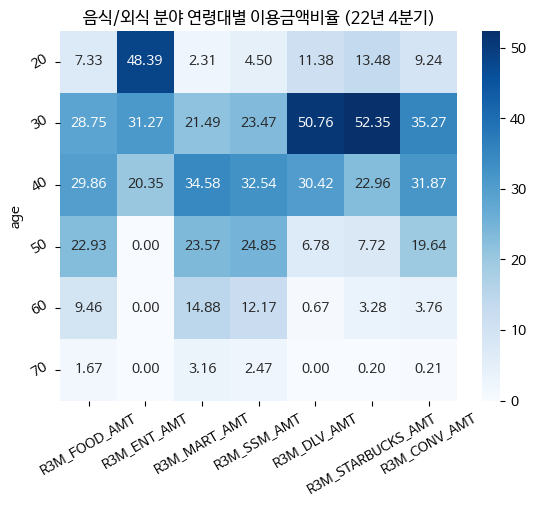

In [96]:
sns.heatmap(df_food_ratio, cmap='Blues', annot=True, fmt=".2f")
plt.title('음식/외식 분야 연령대별 이용금액비율 (22년 4분기)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

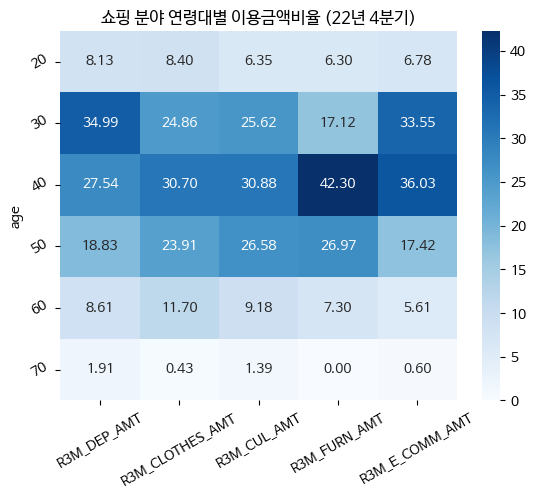

In [97]:
sns.heatmap(df_shopping_ratio, cmap='Blues', annot=True, fmt=".2f")
plt.title('쇼핑 분야 연령대별 이용금액비율 (22년 4분기)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

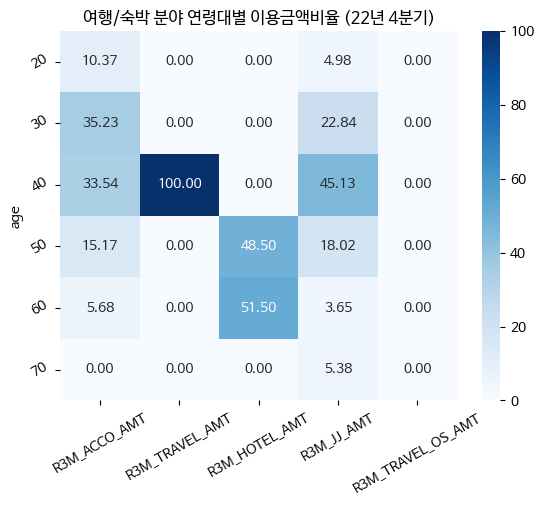

In [98]:
sns.heatmap(df_travel_ratio, cmap='Blues', annot=True, fmt=".2f")
plt.title('여행/숙박 분야 연령대별 이용금액비율 (22년 4분기)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

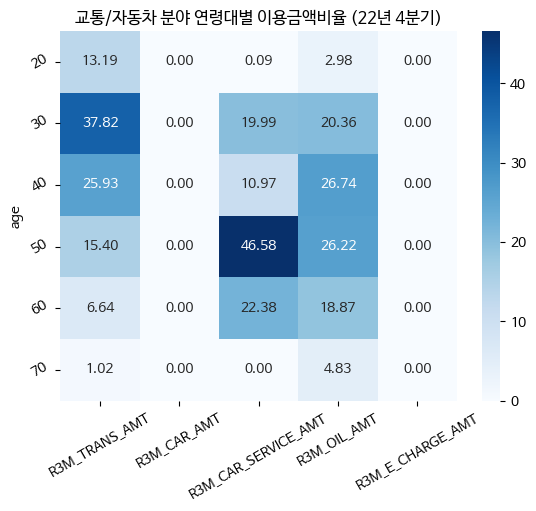

In [99]:
sns.heatmap(df_trans_ratio, cmap='Blues', annot=True, fmt=".2f")
plt.title('교통/자동차 분야 연령대별 이용금액비율 (22년 4분기)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

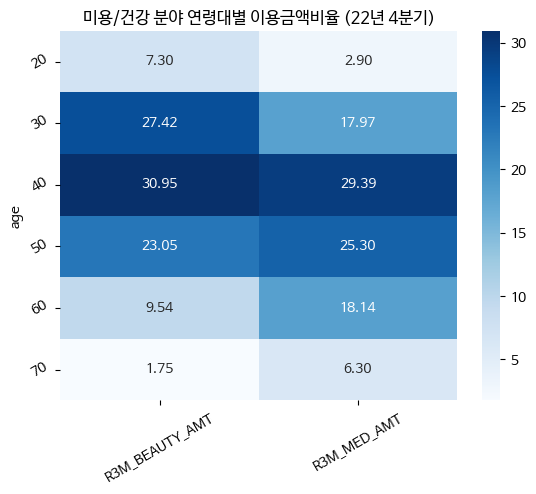

In [100]:
sns.heatmap(df_health_ratio, cmap='Blues', annot=True, fmt=".2f")
plt.title('미용/건강 분야 연령대별 이용금액비율 (22년 4분기)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

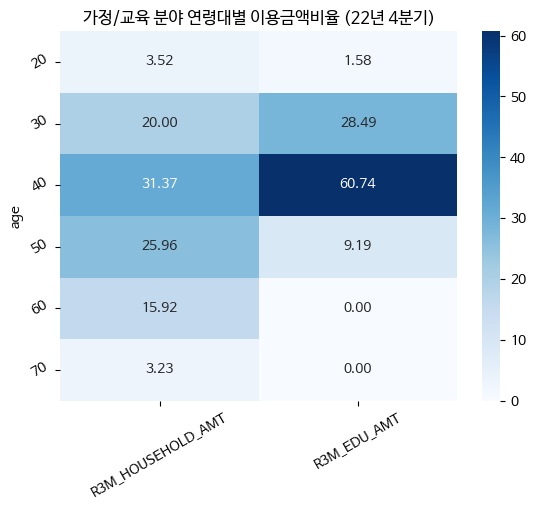

In [101]:
sns.heatmap(df_house_ratio, cmap='Blues', annot=True, fmt=".2f")
plt.title('가정/교육 분야 연령대별 이용금액비율 (22년 4분기)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

# 유지고객의 분포/비율

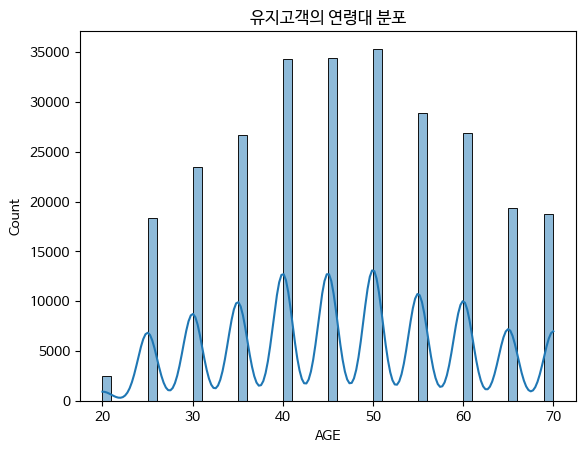

In [158]:
# 유지고객의 연령대 분포
df_not_exited = df_amount[df_amount['이탈여부'] == 0]

sns.histplot(
    df_not_exited,
    x='AGE',
    binwidth=1,
    kde=True
).set(title='유지고객의 연령대 분포')

plt.show()

In [159]:
# 각 연령대의 카테고리별 지출 비율
df_amount_food[df_amount_food['이탈여부'] == 0]

CUST_ID  SEX  AGE  R3M_FOOD_AMT  R3M_ENT_AMT  R3M_MART_AMT  \
0            SYN_0    2   35             0            0             0   
1            SYN_1    2   50             0            0             0   
3            SYN_3    1   25             0            0             0   
4            SYN_4    2   40            93            0             0   
5            SYN_5    2   55           183            0             0   
...            ...  ...  ...           ...          ...           ...   
329994  SYN_329994    1   40           199            0             0   
329995  SYN_329995    1   55             0            0             0   
329996  SYN_329996    2   60             0            0             0   
329998  SYN_329998    2   45             0            0             0   
329999  SYN_329999    1   55           105            0             0   

        R3M_SSM_AMT  R3M_DLV_AMT  R3M_STARBUCKS_AMT  R3M_CONV_AMT  이탈여부  \
0                 0            0                  0             0     0   
1                 0            0                  0             0     0   
3                 0            0                  0             0     0   
4               183          373                  0             0     0   
5               320            0                  0             0     0   
...             ...          ...                ...           ...   ...   
329994          356            0                  0           283     0   
329995            0            0                  0             0     0   
329996            0            0                  0             0     0   
329998            0            0                  0             0     0   
329999           74            0                  0             0     0   

        food_sum  
0              0  
1              0  
3              0  
4            649  
5            503  
...          ...  
329994       838  
329995         0  
329996         0  
329998         0  
329999       179  

[269037 rows x 12 columns]

## 01 카테고리별 유지고객 dataframe 생성

In [160]:
df_food_not_exited = df_amount_food[df_amount_food['이탈여부'] == 0]
df_shopping_not_exited = df_amount_shopping[df_amount_shopping['이탈여부'] == 0]
df_travel_not_exited = df_amount_travel[df_amount_travel['이탈여부'] == 0]
df_trans_not_exited = df_amount_trans[df_amount_trans['이탈여부'] == 0]
df_health_not_exited = df_amount_health[df_amount_health['이탈여부'] == 0]
df_house_not_exited = df_amount_house[df_amount_house['이탈여부'] == 0]

In [161]:
df_food_not_exited

CUST_ID  SEX  AGE  R3M_FOOD_AMT  R3M_ENT_AMT  R3M_MART_AMT  \
0            SYN_0    2   35             0            0             0   
1            SYN_1    2   50             0            0             0   
3            SYN_3    1   25             0            0             0   
4            SYN_4    2   40            93            0             0   
5            SYN_5    2   55           183            0             0   
...            ...  ...  ...           ...          ...           ...   
329994  SYN_329994    1   40           199            0             0   
329995  SYN_329995    1   55             0            0             0   
329996  SYN_329996    2   60             0            0             0   
329998  SYN_329998    2   45             0            0             0   
329999  SYN_329999    1   55           105            0             0   

        R3M_SSM_AMT  R3M_DLV_AMT  R3M_STARBUCKS_AMT  R3M_CONV_AMT  이탈여부  \
0                 0            0                  0             0     0   
1                 0            0                  0             0     0   
3                 0            0                  0             0     0   
4               183          373                  0             0     0   
5               320            0                  0             0     0   
...             ...          ...                ...           ...   ...   
329994          356            0                  0           283     0   
329995            0            0                  0             0     0   
329996            0            0                  0             0     0   
329998            0            0                  0             0     0   
329999           74            0                  0             0     0   

        food_sum  
0              0  
1              0  
3              0  
4            649  
5            503  
...          ...  
329994       838  
329995         0  
329996         0  
329998         0  
329999       179  

[269037 rows x 12 columns]

In [162]:
df_shopping_not_exited

CUST_ID  SEX  AGE  R3M_DEP_AMT  R3M_CLOTHES_AMT  R3M_CUL_AMT  \
0            SYN_0    2   35            0                0            0   
1            SYN_1    2   50          131                0            0   
3            SYN_3    1   25            0                0            0   
4            SYN_4    2   40            0                0            0   
5            SYN_5    2   55            0                0            0   
...            ...  ...  ...          ...              ...          ...   
329994  SYN_329994    1   40            0                0            0   
329995  SYN_329995    1   55            0                0            0   
329996  SYN_329996    2   60            0                0            0   
329998  SYN_329998    2   45            0                0            0   
329999  SYN_329999    1   55            0                0            0   

        R3M_FURN_AMT  R3M_E_COMM_AMT  이탈여부  shopping_sum  
0                  0               0     0             0  
1                  0               0     0           131  
3                  0               0     0             0  
4                  0             819     0           819  
5                  0               0     0             0  
...              ...             ...   ...           ...  
329994             0             421     0           421  
329995             0             309     0           309  
329996             0               0     0             0  
329998             0               0     0             0  
329999             0               0     0             0  

[269037 rows x 10 columns]

In [163]:
df_travel_not_exited

CUST_ID  SEX  AGE  R3M_ACCO_AMT  R3M_TRAVEL_AMT  R3M_HOTEL_AMT  \
0            SYN_0    2   35             0               0              0   
1            SYN_1    2   50             0               0              0   
3            SYN_3    1   25             0               0              0   
4            SYN_4    2   40             0               0              0   
5            SYN_5    2   55             0               0              0   
...            ...  ...  ...           ...             ...            ...   
329994  SYN_329994    1   40             0               0              0   
329995  SYN_329995    1   55             0               0              0   
329996  SYN_329996    2   60             0               0              0   
329998  SYN_329998    2   45             0               0              0   
329999  SYN_329999    1   55             0               0              0   

        R3M_JJ_AMT  R3M_TRAVEL_OS_AMT  이탈여부  travel_sum  
0                0                  0     0           0  
1                0                  0     0           0  
3                0                  0     0           0  
4                0                  0     0           0  
5                0                  0     0           0  
...            ...                ...   ...         ...  
329994           0                  0     0           0  
329995           0                  0     0           0  
329996           0                  0     0           0  
329998           0                  0     0           0  
329999           0                  0     0           0  

[269037 rows x 10 columns]

In [164]:
df_trans_not_exited

CUST_ID  SEX  AGE  R3M_TRANS_AMT  R3M_CAR_AMT  R3M_CAR_SERVICE_AMT  \
0            SYN_0    2   35              0            0                    0   
1            SYN_1    2   50              0            0                    0   
3            SYN_3    1   25              0            0                    0   
4            SYN_4    2   40              0            0                    0   
5            SYN_5    2   55              0            0                    0   
...            ...  ...  ...            ...          ...                  ...   
329994  SYN_329994    1   40             47            0                    0   
329995  SYN_329995    1   55             59            0                    0   
329996  SYN_329996    2   60              0            0                    0   
329998  SYN_329998    2   45              0            0                    0   
329999  SYN_329999    1   55              0            0                    0   

        R3M_OIL_AMT  R3M_E_CHARGE_AMT  이탈여부  trans_sum  
0                 0                 0     0          0  
1                 0                 0     0          0  
3                 0                 0     0          0  
4                 0                 0     0          0  
5               298                 0     0        298  
...             ...               ...   ...        ...  
329994          235                 0     0        282  
329995            0                 0     0         59  
329996            0                 0     0          0  
329998            0                 0     0          0  
329999            0                 0     0          0  

[269037 rows x 10 columns]

In [165]:
df_health_not_exited

CUST_ID  SEX  AGE  R3M_BEAUTY_AMT  R3M_MED_AMT  이탈여부  health_sum
0            SYN_0    2   35               0            0     0           0
1            SYN_1    2   50               0            0     0           0
3            SYN_3    1   25               0            0     0           0
4            SYN_4    2   40               0            0     0           0
5            SYN_5    2   55               0          202     0         202
...            ...  ...  ...             ...          ...   ...         ...
329994  SYN_329994    1   40               0           83     0          83
329995  SYN_329995    1   55               0            0     0           0
329996  SYN_329996    2   60               0            0     0           0
329998  SYN_329998    2   45               0            0     0           0
329999  SYN_329999    1   55               0            0     0           0

[269037 rows x 7 columns]

In [166]:
df_house_not_exited

CUST_ID  SEX  AGE  R3M_HOUSEHOLD_AMT  R3M_EDU_AMT  이탈여부  house_sum
0            SYN_0    2   35                  0            0     0          0
1            SYN_1    2   50                  0            0     0          0
3            SYN_3    1   25                  0            0     0          0
4            SYN_4    2   40                  0            0     0          0
5            SYN_5    2   55                369            0     0        369
...            ...  ...  ...                ...          ...   ...        ...
329994  SYN_329994    1   40                  0            0     0          0
329995  SYN_329995    1   55                198            0     0        198
329996  SYN_329996    2   60                  0            0     0          0
329998  SYN_329998    2   45                482            0     0        482
329999  SYN_329999    1   55                  0            0     0          0

[269037 rows x 7 columns]

In [169]:
# AGE로 그룹화, food_sum의 합계
df_food_temp = df_food_not_exited.groupby('AGE')['food_sum'].sum()
df_food_temp

AGE
20      875530
25     6750051
30    10424383
35    11856787
40    14845452
45    13214766
50    12546860
55     8612410
60     6152826
65     3676166
70     2621033
Name: food_sum, dtype: int64

In [170]:
# AGE로 그룹화, shopping_sum의 합계
df_shopping_temp = df_shopping_not_exited.groupby('AGE')['shopping_sum'].sum()
df_shopping_temp

AGE
20      664479
25     4828741
30     7860653
35     9203460
40    11336679
45     9438239
50     7273070
55     3961001
60     2431357
65     1187078
70      670936
Name: shopping_sum, dtype: int64

In [171]:
# AGE로 그룹화, travel_sum의 합계
df_travel_temp = df_travel_not_exited.groupby('AGE')['travel_sum'].sum()
df_travel_temp

AGE
20      6154
25     48013
30     82230
35     97416
40    155438
45    134367
50    136221
55    101387
60     70382
65     27813
70     27732
Name: travel_sum, dtype: int64

In [172]:
# AGE로 그룹화, trans_sum의 합계
df_trans_temp = df_trans_not_exited.groupby('AGE')['trans_sum'].sum()
df_trans_temp

AGE
20      68896
25     766192
30    1402002
35    1809384
40    2258458
45    2160884
50    2650792
55    2282640
60    2213146
65    1411048
70    1134605
Name: trans_sum, dtype: int64

In [173]:
# AGE로 그룹화, health_sum의 합계
df_health_temp = df_health_not_exited.groupby('AGE')['health_sum'].sum()
df_health_temp

AGE
20      68082
25     468528
30     779217
35    1052229
40    1516045
45    1556021
50    1664208
55    1310028
60    1192274
65     886110
70     857113
Name: health_sum, dtype: int64

In [174]:
# AGE로 그룹화, house_sum의 합계
df_house_temp = df_house_not_exited.groupby('AGE')['house_sum'].sum()
df_house_temp

AGE
20     101000
25     766364
30    1687895
35    2968061
40    5030095
45    4720547
50    3994227
55    2539283
60    2083920
65    1258205
70     941832
Name: house_sum, dtype: int64

In [181]:
# AGE를 기준으로 각 연령대의 카테고리별 이용금액합계 테이블 합성
df_cat_age_not = pd.merge(df_food_temp, df_shopping_temp, on='AGE')
df_cat_age_not = pd.merge(df_cat_age_not, df_travel_temp, on='AGE')
df_cat_age_not = pd.merge(df_cat_age_not, df_trans_temp, on='AGE')
df_cat_age_not = pd.merge(df_cat_age_not, df_health_temp, on='AGE')
df_cat_age_not = pd.merge(df_cat_age_not, df_house_temp, on='AGE')

In [182]:
df_cat_age_not

food_sum  shopping_sum  travel_sum  trans_sum  health_sum  house_sum
AGE                                                                      
20     875530        664479        6154      68896       68082     101000
25    6750051       4828741       48013     766192      468528     766364
30   10424383       7860653       82230    1402002      779217    1687895
35   11856787       9203460       97416    1809384     1052229    2968061
40   14845452      11336679      155438    2258458     1516045    5030095
45   13214766       9438239      134367    2160884     1556021    4720547
50   12546860       7273070      136221    2650792     1664208    3994227
55    8612410       3961001      101387    2282640     1310028    2539283
60    6152826       2431357       70382    2213146     1192274    2083920
65    3676166       1187078       27813    1411048      886110    1258205
70    2621033        670936       27732    1134605      857113     941832

In [183]:
# age 컬럼 추가, AGE 기준으로 그룹화 할 예정
df_cat_age_not['age'] = [20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70]
df_cat_age_not

food_sum  shopping_sum  travel_sum  trans_sum  health_sum  house_sum  age
AGE                                                                           
20     875530        664479        6154      68896       68082     101000   20
25    6750051       4828741       48013     766192      468528     766364   20
30   10424383       7860653       82230    1402002      779217    1687895   30
35   11856787       9203460       97416    1809384     1052229    2968061   30
40   14845452      11336679      155438    2258458     1516045    5030095   40
45   13214766       9438239      134367    2160884     1556021    4720547   40
50   12546860       7273070      136221    2650792     1664208    3994227   50
55    8612410       3961001      101387    2282640     1310028    2539283   50
60    6152826       2431357       70382    2213146     1192274    2083920   60
65    3676166       1187078       27813    1411048      886110    1258205   60
70    2621033        670936       27732    1134605      857113     941832   70

In [184]:
# 연령대별 카테고리의 이용금액합계 테이블 생성
df_cat_age_not = df_cat_age_not.groupby('age').sum()
df_cat_age_not

food_sum  shopping_sum  travel_sum  trans_sum  health_sum  house_sum
age                                                                      
20    7625581       5493220       54167     835088      536610     867364
30   22281170      17064113      179646    3211386     1831446    4655956
40   28060218      20774918      289805    4419342     3072066    9750642
50   21159270      11234071      237608    4933432     2974236    6533510
60    9828992       3618435       98195    3624194     2078384    3342125
70    2621033        670936       27732    1134605      857113     941832

In [185]:
df_cat_age_not.sum()

food_sum        91576264
shopping_sum    58855693
travel_sum        887153
trans_sum       18158047
health_sum      11349855
house_sum       26091429
dtype: int64

In [186]:
# 백분율 전환
df_cat_age_not_ratio = df_cat_age_not.div(df_cat_age_not.sum()) * 100
df_cat_age_not_ratio = df_cat_age_not_ratio.round(2)
df_cat_age_not_ratio

food_sum  shopping_sum  travel_sum  trans_sum  health_sum  house_sum
age                                                                      
20       8.33          9.33        6.11       4.60        4.73       3.32
30      24.33         28.99       20.25      17.69       16.14      17.84
40      30.64         35.30       32.67      24.34       27.07      37.37
50      23.11         19.09       26.78      27.17       26.21      25.04
60      10.73          6.15       11.07      19.96       18.31      12.81
70       2.86          1.14        3.13       6.25        7.55       3.61

In [187]:
df_cat_age_not_ratio.sum()

food_sum        100.00
shopping_sum    100.00
travel_sum      100.01
trans_sum       100.01
health_sum      100.01
house_sum        99.99
dtype: float64

## heatmap: 카테고리별 (유지고객)연령대의 이용금액비율

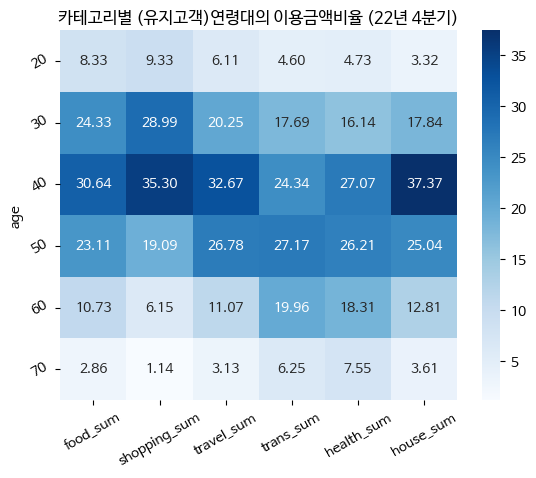

In [188]:
sns.heatmap(df_cat_age_not_ratio, cmap='Blues', annot=True, fmt=".2f")
plt.title('카테고리별 (유지고객)연령대의 이용금액비율 (22년 4분기)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

## 02 카테고리 세부항목별 유지고객 dataframe 생성
- 카테고리 세부항목의 연령대별 비율 보기

In [190]:
df_food_not_exited_age = df_food_not_exited.iloc[:, 2:10]
df_shopping_not_exited_age = df_shopping_not_exited.iloc[:, 2:8]
df_travel_not_exited_age = df_travel_not_exited.iloc[:, 2:8]
df_trans_not_exited_age = df_trans_not_exited.iloc[:, 2:8]
df_health_not_exited_age = df_health_not_exited.iloc[:, 2:5]
df_house_not_exited_age = df_house_not_exited.iloc[:, 2:5]

In [191]:
df_food_not_exited_age

AGE  R3M_FOOD_AMT  R3M_ENT_AMT  R3M_MART_AMT  R3M_SSM_AMT  \
0        35             0            0             0            0   
1        50             0            0             0            0   
3        25             0            0             0            0   
4        40            93            0             0          183   
5        55           183            0             0          320   
...     ...           ...          ...           ...          ...   
329994   40           199            0             0          356   
329995   55             0            0             0            0   
329996   60             0            0             0            0   
329998   45             0            0             0            0   
329999   55           105            0             0           74   

        R3M_DLV_AMT  R3M_STARBUCKS_AMT  R3M_CONV_AMT  
0                 0                  0             0  
1                 0                  0             0  
3                 0                  0             0  
4               373                  0             0  
5                 0                  0             0  
...             ...                ...           ...  
329994            0                  0           283  
329995            0                  0             0  
329996            0                  0             0  
329998            0                  0             0  
329999            0                  0             0  

[269037 rows x 8 columns]

In [192]:
df_shopping_not_exited_age

AGE  R3M_DEP_AMT  R3M_CLOTHES_AMT  R3M_CUL_AMT  R3M_FURN_AMT  \
0        35            0                0            0             0   
1        50          131                0            0             0   
3        25            0                0            0             0   
4        40            0                0            0             0   
5        55            0                0            0             0   
...     ...          ...              ...          ...           ...   
329994   40            0                0            0             0   
329995   55            0                0            0             0   
329996   60            0                0            0             0   
329998   45            0                0            0             0   
329999   55            0                0            0             0   

        R3M_E_COMM_AMT  
0                    0  
1                    0  
3                    0  
4                  819  
5                    0  
...                ...  
329994             421  
329995             309  
329996               0  
329998               0  
329999               0  

[269037 rows x 6 columns]

In [193]:
df_travel_not_exited_age

AGE  R3M_ACCO_AMT  R3M_TRAVEL_AMT  R3M_HOTEL_AMT  R3M_JJ_AMT  \
0        35             0               0              0           0   
1        50             0               0              0           0   
3        25             0               0              0           0   
4        40             0               0              0           0   
5        55             0               0              0           0   
...     ...           ...             ...            ...         ...   
329994   40             0               0              0           0   
329995   55             0               0              0           0   
329996   60             0               0              0           0   
329998   45             0               0              0           0   
329999   55             0               0              0           0   

        R3M_TRAVEL_OS_AMT  
0                       0  
1                       0  
3                       0  
4                       0  
5                       0  
...                   ...  
329994                  0  
329995                  0  
329996                  0  
329998                  0  
329999                  0  

[269037 rows x 6 columns]

In [194]:
df_trans_not_exited_age

AGE  R3M_TRANS_AMT  R3M_CAR_AMT  R3M_CAR_SERVICE_AMT  R3M_OIL_AMT  \
0        35              0            0                    0            0   
1        50              0            0                    0            0   
3        25              0            0                    0            0   
4        40              0            0                    0            0   
5        55              0            0                    0          298   
...     ...            ...          ...                  ...          ...   
329994   40             47            0                    0          235   
329995   55             59            0                    0            0   
329996   60              0            0                    0            0   
329998   45              0            0                    0            0   
329999   55              0            0                    0            0   

        R3M_E_CHARGE_AMT  
0                      0  
1                      0  
3                      0  
4                      0  
5                      0  
...                  ...  
329994                 0  
329995                 0  
329996                 0  
329998                 0  
329999                 0  

[269037 rows x 6 columns]

In [195]:
df_health_not_exited_age

AGE  R3M_BEAUTY_AMT  R3M_MED_AMT
0        35               0            0
1        50               0            0
3        25               0            0
4        40               0            0
5        55               0          202
...     ...             ...          ...
329994   40               0           83
329995   55               0            0
329996   60               0            0
329998   45               0            0
329999   55               0            0

[269037 rows x 3 columns]

In [196]:
df_house_not_exited_age

AGE  R3M_HOUSEHOLD_AMT  R3M_EDU_AMT
0        35                  0            0
1        50                  0            0
3        25                  0            0
4        40                  0            0
5        55                369            0
...     ...                ...          ...
329994   40                  0            0
329995   55                198            0
329996   60                  0            0
329998   45                482            0
329999   55                  0            0

[269037 rows x 3 columns]

In [197]:
# 1차 그룹화
df_food_not_exited_age = df_food_not_exited_age.groupby('AGE').sum()
# 연령대별 그룹화를 위한 컬럼 추가
df_food_not_exited_age['age'] = [20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70]
# 2차 그룹화
df_food_not_exited_age = df_food_not_exited_age.groupby('age').sum()

df_food_not_exited_age

R3M_FOOD_AMT  R3M_ENT_AMT  R3M_MART_AMT  R3M_SSM_AMT  R3M_DLV_AMT  \
age                                                                      
20        3069771         2889        230372      2196956       857146   
30        7642400         1466       1538589      7796292      2201244   
40        8871035         1551       2589647     11944914      1636086   
50        7135497          247       2057578      9663384       408202   
60        3106450            0       1169280      4984740        28860   
70         761336            0        364029      1425167         4276   

     R3M_STARBUCKS_AMT  R3M_CONV_AMT  
age                                   
20               41063       1227384  
30               92548       3008631  
40               50415       2966570  
50               19631       1874731  
60                3177        536485  
70                 274         65951

In [198]:
# 나머지 dataframe도 동일 작업

# 1차 그룹화
df_shopping_not_exited_age = df_shopping_not_exited_age.groupby('AGE').sum()
df_travel_not_exited_age = df_travel_not_exited_age.groupby('AGE').sum()
df_trans_not_exited_age = df_trans_not_exited_age.groupby('AGE').sum()
df_health_not_exited_age = df_health_not_exited_age.groupby('AGE').sum()
df_house_not_exited_age = df_house_not_exited_age.groupby('AGE').sum()

# 연령대별 그룹화를 위한 컬럼 추가
df_shopping_not_exited_age['age'] = [20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70]
df_travel_not_exited_age['age'] = [20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70]
df_trans_not_exited_age['age'] = [20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70]
df_health_not_exited_age['age'] = [20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70]
df_house_not_exited_age['age'] = [20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70]

# 2차 그룹화
df_shopping_not_exited_age = df_shopping_not_exited_age.groupby('age').sum()
df_travel_not_exited_age = df_travel_not_exited_age.groupby('age').sum()
df_trans_not_exited_age = df_trans_not_exited_age.groupby('age').sum()
df_health_not_exited_age = df_health_not_exited_age.groupby('age').sum()
df_house_not_exited_age = df_house_not_exited_age.groupby('age').sum()

In [199]:
df_shopping_not_exited_age

R3M_DEP_AMT  R3M_CLOTHES_AMT  R3M_CUL_AMT  R3M_FURN_AMT  R3M_E_COMM_AMT
age                                                                         
20        291570           110604       374360          5758         4710928
30        818038           211687       952412         33760        15048216
40        767255           287559      1400672         53612        18265820
50        497722           224175      1207781         35650         9268743
60        207170           106899       448856         14509         2841001
70         65049            18772        77035          1880          508200

In [200]:
df_travel_not_exited_age

R3M_ACCO_AMT  R3M_TRAVEL_AMT  R3M_HOTEL_AMT  R3M_JJ_AMT  \
age                                                            
20          21082            1393              0       31692   
30          55613            4409           1794      117830   
40          58444            4457           2825      224079   
50          31089            4213           1398      200908   
60          12817            1087           1759       82532   
70           2764               0           1785       23183   

     R3M_TRAVEL_OS_AMT  
age                     
20                   0  
30                   0  
40                   0  
50                   0  
60                   0  
70                   0

In [201]:
df_trans_not_exited_age

R3M_TRANS_AMT  R3M_CAR_AMT  R3M_CAR_SERVICE_AMT  R3M_OIL_AMT  \
age                                                                 
20          246722            0                 2359       586007   
30          419343            0                25366      2766677   
40          309441            0                66857      4043044   
50          228016            0               211125      4494291   
60           86499            0               161140      3376555   
70           18115            0                 3814      1112676   

     R3M_E_CHARGE_AMT  
age                    
20                  0  
30                  0  
40                  0  
50                  0  
60                  0  
70                  0

In [202]:
df_health_not_exited_age

R3M_BEAUTY_AMT  R3M_MED_AMT
age                             
20           145473       391137
30           362430      1469016
40           442299      2629767
50           378354      2595882
60           171233      1907151
70            36467       820646

In [203]:
df_house_not_exited_age

R3M_HOUSEHOLD_AMT  R3M_EDU_AMT
age                                
20              797959        69405
30             3443203      1212753
40             6386964      3363678
50             5960646       572864
60             3335977         6148
70              938866         2966

In [207]:
# 백분율 전환
df_food_not_ratio = df_food_not_exited_age.div(df_food_not_exited_age.sum()) * 100
df_shopping_not_ratio = df_shopping_not_exited_age.div(df_shopping_not_exited_age.sum()) * 100
df_travel_not_ratio = df_travel_not_exited_age.div(df_travel_not_exited_age.sum()) * 100
df_trans_not_ratio = df_trans_not_exited_age.div(df_trans_not_exited_age.sum()) * 100
df_health_not_ratio = df_health_not_exited_age.div(df_health_not_exited_age.sum()) * 100
df_house_not_ratio = df_house_not_exited_age.div(df_house_not_exited_age.sum()) * 100

df_food_not_ratio = df_food_not_ratio.round(2)
df_shopping_not_ratio = df_shopping_not_ratio.round(2)
df_travel_not_ratio = df_travel_not_ratio.round(2)
df_trans_not_ratio = df_trans_not_ratio.round(2)
df_health_not_ratio = df_health_not_ratio.round(2)
df_house_not_ratio = df_house_not_ratio.round(2)

In [208]:
df_food_not_ratio

R3M_FOOD_AMT  R3M_ENT_AMT  R3M_MART_AMT  R3M_SSM_AMT  R3M_DLV_AMT  \
age                                                                      
20          10.04        46.95          2.90         5.78        16.69   
30          24.99        23.83         19.35        20.51        42.86   
40          29.00        25.21         32.58        31.42        31.86   
50          23.33         4.01         25.88        25.42         7.95   
60          10.16         0.00         14.71        13.11         0.56   
70           2.49         0.00          4.58         3.75         0.08   

     R3M_STARBUCKS_AMT  R3M_CONV_AMT  
age                                   
20               19.83         12.68  
30               44.69         31.08  
40               24.34         30.65  
50                9.48         19.37  
60                1.53          5.54  
70                0.13          0.68

In [209]:
df_shopping_not_ratio

R3M_DEP_AMT  R3M_CLOTHES_AMT  R3M_CUL_AMT  R3M_FURN_AMT  R3M_E_COMM_AMT
age                                                                         
20         11.02            11.52         8.39          3.97            9.30
30         30.91            22.06        21.35         23.26           29.71
40         28.99            29.96        31.40         36.93           36.07
50         18.80            23.36        27.07         24.56           18.30
60          7.83            11.14        10.06          9.99            5.61
70          2.46             1.96         1.73          1.30            1.00

In [210]:
df_travel_not_ratio  # nan 확인해보기

R3M_ACCO_AMT  R3M_TRAVEL_AMT  R3M_HOTEL_AMT  R3M_JJ_AMT  \
age                                                            
20          11.60            8.95           0.00        4.66   
30          30.59           28.34          18.76       17.32   
40          32.15           28.65          29.55       32.94   
50          17.10           27.08          14.62       29.54   
60           7.05            6.99          18.40       12.13   
70           1.52            0.00          18.67        3.41   

     R3M_TRAVEL_OS_AMT  
age                     
20                 NaN  
30                 NaN  
40                 NaN  
50                 NaN  
60                 NaN  
70                 NaN

In [211]:
df_travel_not_exited_age

# 모든 행의 데이터가 0이면 nan
# 결측값 처리 -> fillna(0)

R3M_ACCO_AMT  R3M_TRAVEL_AMT  R3M_HOTEL_AMT  R3M_JJ_AMT  \
age                                                            
20          21082            1393              0       31692   
30          55613            4409           1794      117830   
40          58444            4457           2825      224079   
50          31089            4213           1398      200908   
60          12817            1087           1759       82532   
70           2764               0           1785       23183   

     R3M_TRAVEL_OS_AMT  
age                     
20                   0  
30                   0  
40                   0  
50                   0  
60                   0  
70                   0

In [212]:
df_travel_not_ratio = df_travel_not_ratio.fillna(0)
df_travel_not_ratio

R3M_ACCO_AMT  R3M_TRAVEL_AMT  R3M_HOTEL_AMT  R3M_JJ_AMT  \
age                                                            
20          11.60            8.95           0.00        4.66   
30          30.59           28.34          18.76       17.32   
40          32.15           28.65          29.55       32.94   
50          17.10           27.08          14.62       29.54   
60           7.05            6.99          18.40       12.13   
70           1.52            0.00          18.67        3.41   

     R3M_TRAVEL_OS_AMT  
age                     
20                 0.0  
30                 0.0  
40                 0.0  
50                 0.0  
60                 0.0  
70                 0.0

In [213]:
df_trans_not_ratio  # nan 확인해보기

R3M_TRANS_AMT  R3M_CAR_AMT  R3M_CAR_SERVICE_AMT  R3M_OIL_AMT  \
age                                                                 
20           18.86          NaN                 0.50         3.58   
30           32.06          NaN                 5.39        16.89   
40           23.66          NaN                14.20        24.68   
50           17.43          NaN                44.86        27.44   
60            6.61          NaN                34.24        20.61   
70            1.38          NaN                 0.81         6.79   

     R3M_E_CHARGE_AMT  
age                    
20                NaN  
30                NaN  
40                NaN  
50                NaN  
60                NaN  
70                NaN

In [214]:
df_trans_not_exited_age

# 모든 행의 데이터가 0이면 nan
# 결측값 처리 -> fillna(0)

R3M_TRANS_AMT  R3M_CAR_AMT  R3M_CAR_SERVICE_AMT  R3M_OIL_AMT  \
age                                                                 
20          246722            0                 2359       586007   
30          419343            0                25366      2766677   
40          309441            0                66857      4043044   
50          228016            0               211125      4494291   
60           86499            0               161140      3376555   
70           18115            0                 3814      1112676   

     R3M_E_CHARGE_AMT  
age                    
20                  0  
30                  0  
40                  0  
50                  0  
60                  0  
70                  0

In [215]:
df_trans_not_ratio = df_trans_not_ratio.fillna(0)
df_trans_not_ratio

R3M_TRANS_AMT  R3M_CAR_AMT  R3M_CAR_SERVICE_AMT  R3M_OIL_AMT  \
age                                                                 
20           18.86          0.0                 0.50         3.58   
30           32.06          0.0                 5.39        16.89   
40           23.66          0.0                14.20        24.68   
50           17.43          0.0                44.86        27.44   
60            6.61          0.0                34.24        20.61   
70            1.38          0.0                 0.81         6.79   

     R3M_E_CHARGE_AMT  
age                    
20                0.0  
30                0.0  
40                0.0  
50                0.0  
60                0.0  
70                0.0

In [216]:
df_health_not_ratio

R3M_BEAUTY_AMT  R3M_MED_AMT
age                             
20             9.47         3.99
30            23.59        14.97
40            28.79        26.80
50            24.63        26.45
60            11.15        19.43
70             2.37         8.36

In [217]:
df_house_not_ratio

R3M_HOUSEHOLD_AMT  R3M_EDU_AMT
age                                
20                3.82         1.33
30               16.50        23.20
40               30.61        64.34
50               28.57        10.96
60               15.99         0.12
70                4.50         0.06

## heatmap: 카테고리 세부항목별 연령대의 이용금액비율

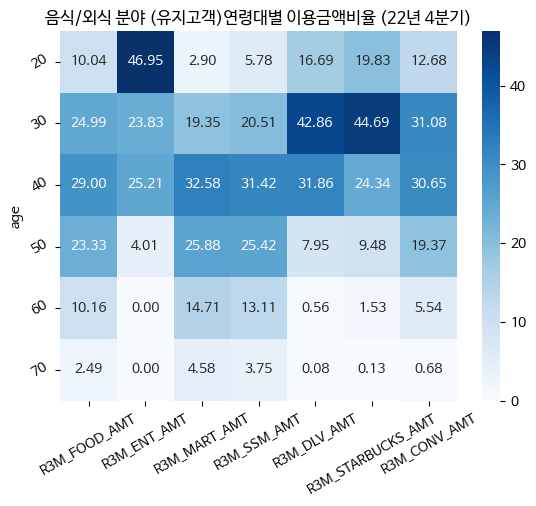

In [218]:
sns.heatmap(df_food_not_ratio, cmap='Blues', annot=True, fmt=".2f")
plt.title('음식/외식 분야 (유지고객)연령대별 이용금액비율 (22년 4분기)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

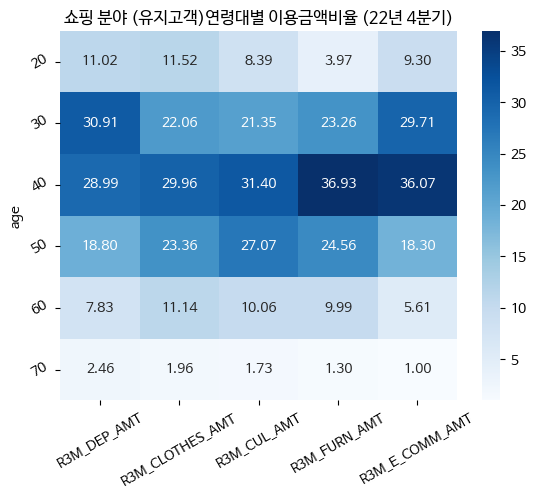

In [219]:
sns.heatmap(df_shopping_not_ratio, cmap='Blues', annot=True, fmt=".2f")
plt.title('쇼핑 분야 (유지고객)연령대별 이용금액비율 (22년 4분기)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

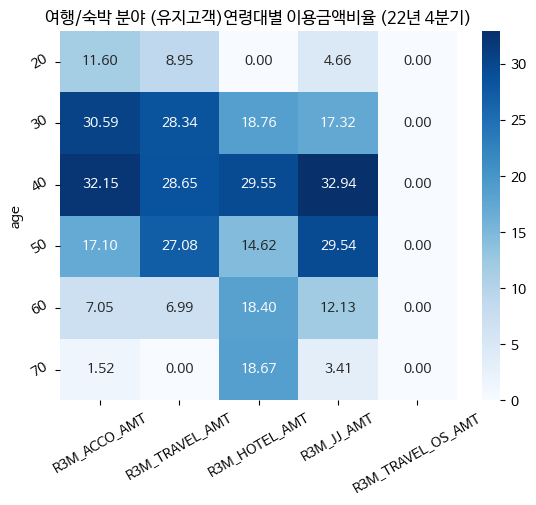

In [220]:
sns.heatmap(df_travel_not_ratio, cmap='Blues', annot=True, fmt=".2f")
plt.title('여행/숙박 분야 (유지고객)연령대별 이용금액비율 (22년 4분기)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

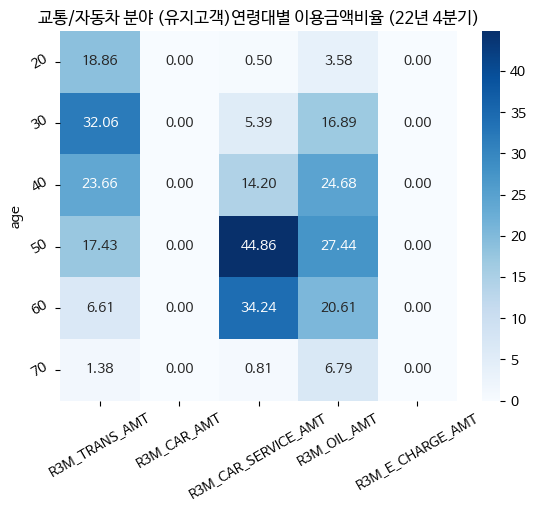

In [221]:
sns.heatmap(df_trans_not_ratio, cmap='Blues', annot=True, fmt=".2f")
plt.title('교통/자동차 분야 (유지고객)연령대별 이용금액비율 (22년 4분기)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

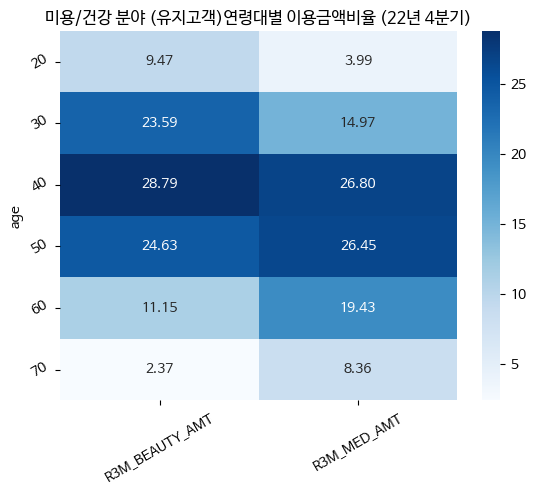

In [222]:
sns.heatmap(df_health_not_ratio, cmap='Blues', annot=True, fmt=".2f")
plt.title('미용/건강 분야 (유지고객)연령대별 이용금액비율 (22년 4분기)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

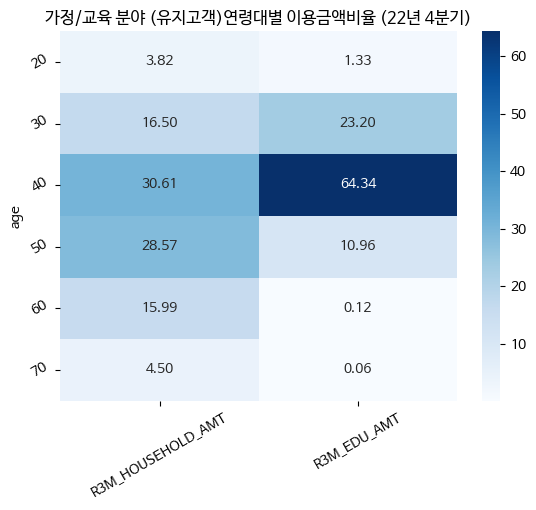

In [223]:
sns.heatmap(df_house_not_ratio, cmap='Blues', annot=True, fmt=".2f")
plt.title('가정/교육 분야 (유지고객)연령대별 이용금액비율 (22년 4분기)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

# 12개월 데이터 보기

In [280]:
# 이탈고객 추출
# usecols = [3, 307, 308, 320, 321, 322, 738]
usecols = [3, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326]

df_12m = df[df.columns[usecols]]
df_12m = df_12m[df_12m['이탈여부'] == 1]
df_12m = df_12m.iloc[:, 0:6]  # 이탈여부 drop
df_12m

AGE  R12M_ACCO_AMT  R12M_TRAVEL_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  \
12       40              0                0               0            0   
17       30              0                0               0            0   
21       40              0                0               0            0   
29       50              0                0               0            0   
38       45              0                0               0            0   
...     ...            ...              ...             ...          ...   
329822   70              0                0               0            0   
329857   35              0                0               0            0   
329863   50              0                0               0            0   
329968   65              0                0               0            0   
329973   35              0                0               0            0   

        R12M_TRAVEL_OS_AMT  
12                       0  
17                       0  
21                       0  
29                       0  
38                       0  
...                    ...  
329822                   0  
329857                   0  
329863                   0  
329968                   0  
329973                   0  

[14908 rows x 6 columns]

In [281]:
# 연령대 수정
df_12m = df_12m.replace({'AGE' : 25}, 20)
df_12m = df_12m.replace({'AGE' : 35}, 30)
df_12m = df_12m.replace({'AGE' : 45}, 40)
df_12m = df_12m.replace({'AGE' : 55}, 50)
df_12m = df_12m.replace({'AGE' : 65}, 60)
df_12m.groupby('AGE').sum()

R12M_ACCO_AMT  R12M_TRAVEL_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  \
AGE                                                                
20            4872                0               0         5649   
30           18079              259               0        22212   
40           16799              494             435        50312   
50            7459                0            1333        21699   
60            3643                0             428         4471   
70               0                0               0         6082   

     R12M_TRAVEL_OS_AMT  
AGE                      
20                    0  
30                    0  
40                    0  
50                    0  
60                    0  
70                    0

## 이용금액이 있는 이탈고객

In [284]:
# 이용금액이 있는 이탈고객 추출(239건/14908건)
df_12m_exited = df_12m.query('R12M_ACCO_AMT != 0 or R12M_TRAVEL_AMT != 0 or R12M_HOTEL_AMT != 0 or R12M_JJ_AMT != 0 or R12M_TRAVEL_OS_AMT != 0')
df_12m_exited

AGE  R12M_ACCO_AMT  R12M_TRAVEL_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  \
291      30            293                0               0            0   
7160     20            257                0               0            0   
8486     40            316                0               0            0   
8770     40            349                0               0            0   
12519    30            397                0               0            0   
...     ...            ...              ...             ...          ...   
322239   30            324                0               0            0   
323848   50              0                0               0         1951   
325586   40            397                0               0            0   
326788   30            232                0               0            0   
328165   30              0                0               0         1712   

        R12M_TRAVEL_OS_AMT  
291                      0  
7160                     0  
8486                     0  
8770                     0  
12519                    0  
...                    ...  
322239                   0  
323848                   0  
325586                   0  
326788                   0  
328165                   0  

[239 rows x 6 columns]

In [287]:
df_12m_exited = df_12m_exited.groupby('AGE').sum()
df_12m_exited

R12M_ACCO_AMT  R12M_TRAVEL_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  \
AGE                                                                
20            4872                0               0         5649   
30           18079              259               0        22212   
40           16799              494             435        50312   
50            7459                0            1333        21699   
60            3643                0             428         4471   
70               0                0               0         6082   

     R12M_TRAVEL_OS_AMT  
AGE                      
20                    0  
30                    0  
40                    0  
50                    0  
60                    0  
70                    0

In [291]:
# 백분율 전환
df_12m_exited = df_12m_exited.div(df_12m_exited.sum()) * 100
df_12m_exited = df_12m_exited.round(2)
df_12m_exited = df_12m_exited.fillna(0)
df_12m_exited

R12M_ACCO_AMT  R12M_TRAVEL_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  \
AGE                                                                
20            9.58              0.0            0.00         5.12   
30           35.55             34.4            0.00        20.12   
40           33.04             65.6           19.81        45.56   
50           14.67              0.0           60.70        19.65   
60            7.16              0.0           19.49         4.05   
70            0.00              0.0            0.00         5.51   

     R12M_TRAVEL_OS_AMT  
AGE                      
20                  0.0  
30                  0.0  
40                  0.0  
50                  0.0  
60                  0.0  
70                  0.0

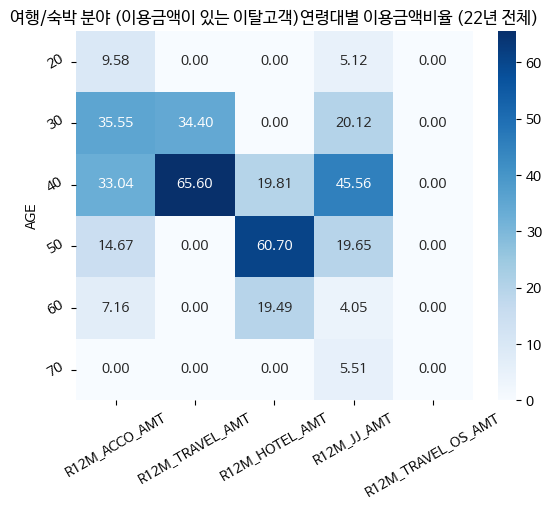

In [310]:
sns.heatmap(df_12m_exited, cmap='Blues', annot=True, fmt=".2f")
plt.title('여행/숙박 분야 (이용금액이 있는 이탈고객)연령대별 이용금액비율 (22년 전체)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

## 이용금액이 있는 유지고객

In [303]:
# 유지고객 추출
usecols = [3, 307, 308, 320, 321, 322, 738]

df_12m = df[df.columns[usecols]]
df_12m = df_12m[df_12m['이탈여부'] == 0]
df_12m = df_12m.iloc[:, 0:6]  # 이탈여부 drop
df_12m

AGE  R12M_ACCO_AMT  R12M_TRAVEL_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  \
0        35              0                0               0            0   
1        50              0                0               0            0   
3        25              0                0               0            0   
4        40              0                0               0            0   
5        55              0                0               0            0   
...     ...            ...              ...             ...          ...   
329994   40              0                0               0            0   
329995   55              0                0               0            0   
329996   60              0                0               0            0   
329998   45              0                0               0            0   
329999   55              0                0               0            0   

        R12M_TRAVEL_OS_AMT  
0                        0  
1                        0  
3                        0  
4                        0  
5                        0  
...                    ...  
329994                   0  
329995                   0  
329996                   0  
329998                   0  
329999                   0  

[269037 rows x 6 columns]

In [304]:
# 연령대 수정
df_12m = df_12m.replace({'AGE' : 25}, 20)
df_12m = df_12m.replace({'AGE' : 35}, 30)
df_12m = df_12m.replace({'AGE' : 45}, 40)
df_12m = df_12m.replace({'AGE' : 55}, 50)
df_12m = df_12m.replace({'AGE' : 65}, 60)
df_12m.groupby('AGE').sum()

R12M_ACCO_AMT  R12M_TRAVEL_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  \
AGE                                                                
20           85825             5415               0       125555   
30          219578            17220            5803       446372   
40          226480            13115            9935       849831   
50          120996            15878            5903       752768   
60           50976             3807            6643       309502   
70           10961                0            4454        85327   

     R12M_TRAVEL_OS_AMT  
AGE                      
20                    0  
30                    0  
40                    0  
50                    0  
60                    0  
70                    0

In [305]:
df_12m_not_exited = df_12m.query('R12M_ACCO_AMT != 0 or R12M_TRAVEL_AMT != 0 or R12M_HOTEL_AMT != 0 or R12M_JJ_AMT != 0 or R12M_TRAVEL_OS_AMT != 0')
df_12m_not_exited

AGE  R12M_ACCO_AMT  R12M_TRAVEL_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  \
33       30              0                0               0         2141   
66       20              0                0               0         1350   
109      40              0                0               0         1782   
176      40              0                0               0         2192   
222      60            384                0               0            0   
...     ...            ...              ...             ...          ...   
329415   50              0                0               0         2036   
329449   50            179                0               0            0   
329603   40            184                0               0            0   
329924   40            328              524               0         1761   
329963   40              0                0               0          489   

        R12M_TRAVEL_OS_AMT  
33                       0  
66                       0  
109                      0  
176                      0  
222                      0  
...                    ...  
329415                   0  
329449                   0  
329603                   0  
329924                   0  
329963                   0  

[3986 rows x 6 columns]

In [306]:
df_12m_not_exited = df_12m_not_exited.groupby('AGE').sum()
df_12m_not_exited

R12M_ACCO_AMT  R12M_TRAVEL_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  \
AGE                                                                
20           85825             5415               0       125555   
30          219578            17220            5803       446372   
40          226480            13115            9935       849831   
50          120996            15878            5903       752768   
60           50976             3807            6643       309502   
70           10961                0            4454        85327   

     R12M_TRAVEL_OS_AMT  
AGE                      
20                    0  
30                    0  
40                    0  
50                    0  
60                    0  
70                    0

In [307]:
# 백분율 전환
df_12m_not_exited = df_12m_not_exited.div(df_12m_not_exited.sum()) * 100
df_12m_not_exited = df_12m_not_exited.round(2)
df_12m_not_exited = df_12m_not_exited.fillna(0)
df_12m_not_exited

R12M_ACCO_AMT  R12M_TRAVEL_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  \
AGE                                                                
20           12.01             9.77            0.00         4.89   
30           30.72            31.06           17.73        17.37   
40           31.68            23.66           30.35        33.08   
50           16.93            28.64           18.03        29.30   
60            7.13             6.87           20.29        12.05   
70            1.53             0.00           13.60         3.32   

     R12M_TRAVEL_OS_AMT  
AGE                      
20                  0.0  
30                  0.0  
40                  0.0  
50                  0.0  
60                  0.0  
70                  0.0

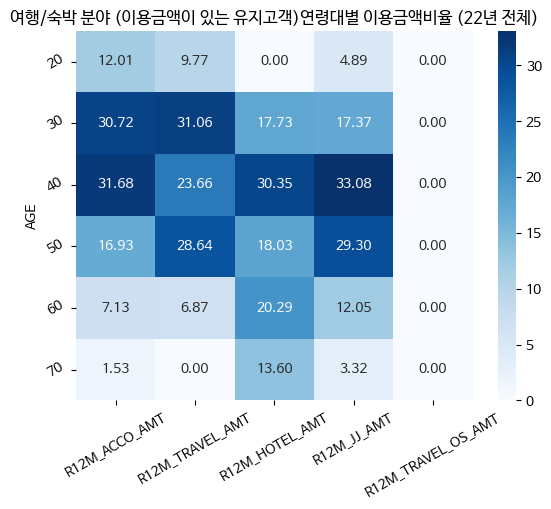

In [309]:
sns.heatmap(df_12m_not_exited, cmap='Blues', annot=True, fmt=".2f")
plt.title('여행/숙박 분야 (이용금액이 있는 유지고객)연령대별 이용금액비율 (22년 전체)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

# #####

## 이용금액이 있는 이탈고객

In [350]:
# 이탈고객 추출
usecols = [3, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 738]

df_12m = df[df.columns[usecols]]
df_12m = df_12m[df_12m['이탈여부'] == 1]
df_12m = df_12m.iloc[:, 0:27]  # 이탈여부 drop
df_12m

AGE  R12M_FOOD_AMT  R12M_ENT_AMT  R12M_DEP_AMT  R12M_MART_AMT  \
12       40              0             0             0              0   
17       30              0             0             0              0   
21       40           1613             0             0            258   
29       50              0             0             0              0   
38       45            375             0             0           2655   
...     ...            ...           ...           ...            ...   
329822   70              0             0             0              0   
329857   35           2498             0             0              0   
329863   50              0             0             0              0   
329968   65            672             0             0              0   
329973   35              0             0             0              0   

        R12M_SSM_AMT  R12M_CLOTHES_AMT  R12M_CUL_AMT  R12M_ACCO_AMT  \
12                 0                 0             0              0   
17                 0                 0             0              0   
21              1014                 0           418              0   
29                 0                 0             0              0   
38              1490                 0             0              0   
...              ...               ...           ...            ...   
329822             0                 0             0              0   
329857          1731                 0           309              0   
329863             0                 0             0              0   
329968           309                 0             0              0   
329973             0                 0             0              0   

        R12M_TRAVEL_AMT  ...  R12M_CAR_SERVICE_AMT  R12M_OIL_AMT  \
12                    0  ...                     0             0   
17                    0  ...                     0             0   
21                    0  ...                     0          1123   
29                    0  ...                     0             0   
38                    0  ...                     0             0   
...                 ...  ...                   ...           ...   
329822                0  ...                     0             0   
329857                0  ...                     0           907   
329863                0  ...                     0             0   
329968                0  ...                     0             0   
329973                0  ...                     0             0   

        R12M_E_COMM_AMT  R12M_DLV_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  \
12                    0             0               0            0   
17                    0             0               0            0   
21                    0             0               0            0   
29                    0             0               0            0   
38                 1349             0               0            0   
...                 ...           ...             ...          ...   
329822                0             0               0            0   
329857             3385             0               0            0   
329863                0             0               0            0   
329968                0             0               0            0   
329973                0             0               0            0   

        R12M_TRAVEL_OS_AMT  R12M_STARBUCKS_AMT  R12M_E_CHARGE_AMT  \
12                       0                   0                  0   
17                       0                   0                  0   
21                       0                   0                  0   
29                       0                   0                  0   
38                       0                   0                  0   
...                    ...                 ...                ...   
329822                   0                   0                  0   
329857                   0                   0                  0   

In [351]:
# 연령대 수정
df_12m = df_12m.replace({'AGE' : 25}, 20)
df_12m = df_12m.replace({'AGE' : 35}, 30)
df_12m = df_12m.replace({'AGE' : 45}, 40)
df_12m = df_12m.replace({'AGE' : 55}, 50)
df_12m = df_12m.replace({'AGE' : 65}, 60)
df_12m.groupby('AGE').sum()

R12M_FOOD_AMT  R12M_ENT_AMT  R12M_DEP_AMT  R12M_MART_AMT  R12M_SSM_AMT  \
AGE                                                                           
20          523795           597         48492          44417        393838   
30         2012823           529        207159         408554       2016861   
40         2043601           179        162284         647510       2789044   
50         1590620             0        111070         450332       2142607   
60          658961             0         53074         275846       1038230   
70          117837             0         11127          61091        216641   

     R12M_CLOTHES_AMT  R12M_CUL_AMT  R12M_ACCO_AMT  R12M_TRAVEL_AMT  \
AGE                                                                   
20              24408         66130           4872                0   
30              63718        258149          18079              259   
40              74368        304593          16799              494   
50              59317        262710           7459                0   
60              28141         91439           3643                0   
70               2153         16184              0                0   

     R12M_TRANS_AMT  ...  R12M_CAR_SERVICE_AMT  R12M_OIL_AMT  R12M_E_COMM_AMT  \
AGE                  ...                                                        
20            38163  ...                   176        105406           806591   
30           109187  ...                 14058        731999          3993154   
40            72980  ...                 11594        976915          4262348   
50            42655  ...                 42233        962236          2063564   
60            18354  ...                 16025        685125           667446   
70             3137  ...                     0        180658            72886   

     R12M_DLV_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  R12M_TRAVEL_OS_AMT  \
AGE                                                                  
20         131061               0         5649                   0   
30         548964               0        22212                   0   
40         340399             435        50312                   0   
50          74385            1333        21699                   0   
60           8411             428         4471                   0   
70              0               0         6082                   0   

     R12M_STARBUCKS_AMT  R12M_E_CHARGE_AMT  R12M_CONV_AMT  
AGE                                                        
20                 6472                  0         200398  
30                24994                  0         714114  
40                10894                  0         640790  
50                 3844                  0         387576  
60                 1620                  0          83592  
70                  181                  0           4157  

[6 rows x 26 columns]

In [352]:
# 카테고리별 업종 컬럼 인덱스
col1 = [0, 1, 2, 4, 5, 20, 24, 26]
col2 = [0, 3, 6, 7, 15, 19]
col3 = [0, 8, 9, 21, 22, 23]
col4 = [0, 10, 16, 17, 18, 25]
col5 = [0, 11, 14]
col6 = [0, 12, 13]

In [372]:
# 카테고리별 이탈고객 dataframe 생성
df_12m_exited_food = df_12m[df_12m.columns[col1]]
df_12m_exited_shopping = df_12m[df_12m.columns[col2]]
df_12m_exited_travel = df_12m[df_12m.columns[col3]]
df_12m_exited_trans = df_12m[df_12m.columns[col4]]
df_12m_exited_health = df_12m[df_12m.columns[col5]]
df_12m_exited_house = df_12m[df_12m.columns[col6]]

In [377]:
# 이용금액이 있는 건만 남기기
df_12m_exited_food = df_12m_exited_food.query('R12M_FOOD_AMT != 0 or R12M_ENT_AMT != 0 or R12M_MART_AMT != 0 or R12M_SSM_AMT != 0 or R12M_DLV_AMT != 0 or R12M_STARBUCKS_AMT != 0 or R12M_CONV_AMT != 0')
df_12m_exited_food = df_12m_exited_food.groupby('AGE').sum()
df_12m_exited_food

R12M_FOOD_AMT  R12M_ENT_AMT  R12M_MART_AMT  R12M_SSM_AMT  R12M_DLV_AMT  \
AGE                                                                           
20          523795           597          44417        393838        131061   
30         2012823           529         408554       2016861        548964   
40         2043601           179         647510       2789044        340399   
50         1590620             0         450332       2142607         74385   
60          658961             0         275846       1038230          8411   
70          117837             0          61091        216641             0   

     R12M_STARBUCKS_AMT  R12M_CONV_AMT  
AGE                                     
20                 6472         200398  
30                24994         714114  
40                10894         640790  
50                 3844         387576  
60                 1620          83592  
70                  181           4157

In [378]:
# 이용금액이 있는 건만 남기기
df_12m_exited_shopping = df_12m_exited_shopping.query('R12M_DEP_AMT != 0 or R12M_CLOTHES_AMT != 0 or R12M_CUL_AMT != 0 or R12M_FURN_AMT != 0 or R12M_E_COMM_AMT != 0')
df_12m_exited_shopping = df_12m_exited_shopping.groupby('AGE').sum()
df_12m_exited_shopping

R12M_DEP_AMT  R12M_CLOTHES_AMT  R12M_CUL_AMT  R12M_FURN_AMT  \
AGE                                                                
20          48492             24408         66130           2294   
30         207159             63718        258149           6962   
40         162284             74368        304593          16262   
50         111070             59317        262710          10491   
60          53074             28141         91439           2989   
70          11127              2153         16184              0   

     R12M_E_COMM_AMT  
AGE                   
20            806591  
30           3993154  
40           4262348  
50           2063564  
60            667446  
70             72886

In [379]:
# 이용금액이 있는 건만 남기기
df_12m_exited_travel = df_12m_exited_travel.query('R12M_ACCO_AMT != 0 or R12M_TRAVEL_AMT != 0 or R12M_HOTEL_AMT != 0 or R12M_JJ_AMT != 0 or R12M_TRAVEL_OS_AMT != 0')
df_12m_exited_travel = df_12m_exited_travel.groupby('AGE').sum()
df_12m_exited_travel

R12M_ACCO_AMT  R12M_TRAVEL_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  \
AGE                                                                
20            4872                0               0         5649   
30           18079              259               0        22212   
40           16799              494             435        50312   
50            7459                0            1333        21699   
60            3643                0             428         4471   
70               0                0               0         6082   

     R12M_TRAVEL_OS_AMT  
AGE                      
20                    0  
30                    0  
40                    0  
50                    0  
60                    0  
70                    0

In [380]:
# 이용금액이 있는 건만 남기기
df_12m_exited_trans = df_12m_exited_trans.query('R12M_TRANS_AMT != 0 or R12M_CAR_AMT != 0 or R12M_CAR_SERVICE_AMT != 0 or R12M_OIL_AMT != 0 or R12M_E_CHARGE_AMT != 0')
df_12m_exited_trans = df_12m_exited_trans.groupby('AGE').sum()
df_12m_exited_trans

R12M_TRANS_AMT  R12M_CAR_AMT  R12M_CAR_SERVICE_AMT  R12M_OIL_AMT  \
AGE                                                                     
20            38163             0                   176        105406   
30           109187             0                 14058        731999   
40            72980             0                 11594        976915   
50            42655             0                 42233        962236   
60            18354             0                 16025        685125   
70             3137             0                     0        180658   

     R12M_E_CHARGE_AMT  
AGE                     
20                   0  
30                   0  
40                   0  
50                   0  
60                   0  
70                   0

In [381]:
# 이용금액이 있는 건만 남기기
df_12m_exited_health = df_12m_exited_health.query('R12M_BEAUTY_AMT != 0 or R12M_MED_AMT != 0')
df_12m_exited_health = df_12m_exited_health.groupby('AGE').sum()
df_12m_exited_health

R12M_BEAUTY_AMT  R12M_MED_AMT
AGE                               
20             26631         63690
30            100870        391795
40            111129        626843
50             83914        547800
60             34930        388888
70              6262        134421

In [382]:
# 이용금액이 있는 건만 남기기
df_12m_exited_house = df_12m_exited_house.query('R12M_HOUSEHOLD_AMT != 0 or R12M_EDU_AMT != 0')
df_12m_exited_house = df_12m_exited_house.groupby('AGE').sum()
df_12m_exited_house

R12M_HOUSEHOLD_AMT  R12M_EDU_AMT
AGE                                  
20               148377         17077
30               860560        407786
40              1347334        869740
50              1118393        134309
60               686547             0
70               139454             0

In [391]:
# 백분율 전환
df_12m_exited_food = df_12m_exited_food.div(df_12m_exited_food.sum()) * 100
df_12m_exited_shopping = df_12m_exited_shopping.div(df_12m_exited_shopping.sum()) * 100
df_12m_exited_travel = df_12m_exited_travel.div(df_12m_exited_travel.sum()) * 100
df_12m_exited_trans = df_12m_exited_trans.div(df_12m_exited_trans.sum()) * 100
df_12m_exited_health = df_12m_exited_health.div(df_12m_exited_health.sum()) * 100
df_12m_exited_house = df_12m_exited_house.div(df_12m_exited_house.sum()) * 100

df_12m_exited_food = df_12m_exited_food.round(2)
df_12m_exited_shopping = df_12m_exited_shopping.round(2)
df_12m_exited_travel = df_12m_exited_travel.round(2)
df_12m_exited_trans = df_12m_exited_trans.round(2)
df_12m_exited_health = df_12m_exited_health.round(2)
df_12m_exited_house = df_12m_exited_house.round(2)

# nan 채우기
df_12m_exited_travel = df_12m_exited_travel.fillna(0)
df_12m_exited_trans = df_12m_exited_trans.fillna(0)

In [392]:
df_12m_exited_food

R12M_FOOD_AMT  R12M_ENT_AMT  R12M_MART_AMT  R12M_SSM_AMT  R12M_DLV_AMT  \
AGE                                                                           
20            7.54         45.75           2.35          4.58         11.88   
30           28.97         40.54          21.64         23.46         49.76   
40           29.41         13.72          34.30         32.44         30.86   
50           22.89          0.00          23.86         24.92          6.74   
60            9.48          0.00          14.61         12.08          0.76   
70            1.70          0.00           3.24          2.52          0.00   

     R12M_STARBUCKS_AMT  R12M_CONV_AMT  
AGE                                     
20                13.48           9.87  
30                52.07          35.17  
40                22.69          31.56  
50                 8.01          19.09  
60                 3.37           4.12  
70                 0.38           0.20

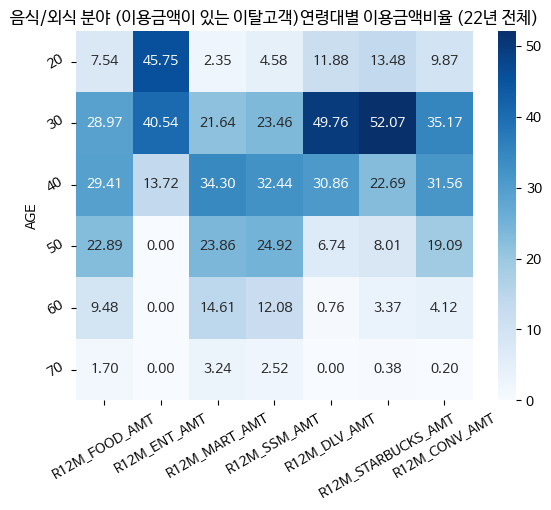

In [398]:
sns.heatmap(df_12m_exited_food, cmap='Blues', annot=True, fmt=".2f")
plt.title('음식/외식 분야 (이용금액이 있는 이탈고객)연령대별 이용금액비율 (22년 전체)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

In [393]:
df_12m_exited_shopping

R12M_DEP_AMT  R12M_CLOTHES_AMT  R12M_CUL_AMT  R12M_FURN_AMT  \
AGE                                                                
20           8.17              9.68          6.62           5.88   
30          34.92             25.27         25.84          17.85   
40          27.36             29.50         30.48          41.70   
50          18.72             23.53         26.29          26.90   
60           8.95             11.16          9.15           7.66   
70           1.88              0.85          1.62           0.00   

     R12M_E_COMM_AMT  
AGE                   
20              6.80  
30             33.65  
40             35.92  
50             17.39  
60              5.62  
70              0.61

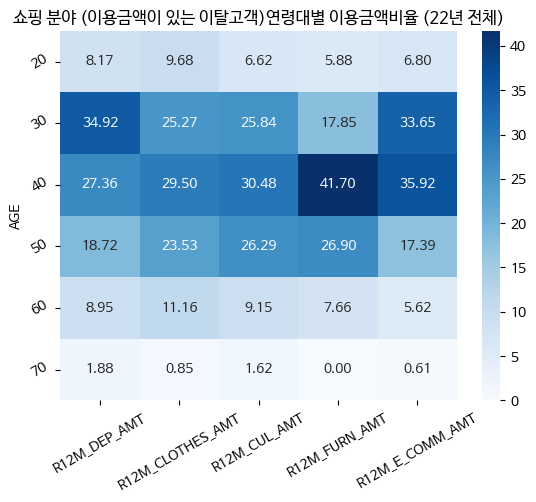

In [399]:
sns.heatmap(df_12m_exited_shopping, cmap='Blues', annot=True, fmt=".2f")
plt.title('쇼핑 분야 (이용금액이 있는 이탈고객)연령대별 이용금액비율 (22년 전체)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

In [394]:
df_12m_exited_travel

R12M_ACCO_AMT  R12M_TRAVEL_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  \
AGE                                                                
20            9.58              0.0            0.00         5.12   
30           35.55             34.4            0.00        20.12   
40           33.04             65.6           19.81        45.56   
50           14.67              0.0           60.70        19.65   
60            7.16              0.0           19.49         4.05   
70            0.00              0.0            0.00         5.51   

     R12M_TRAVEL_OS_AMT  
AGE                      
20                  0.0  
30                  0.0  
40                  0.0  
50                  0.0  
60                  0.0  
70                  0.0

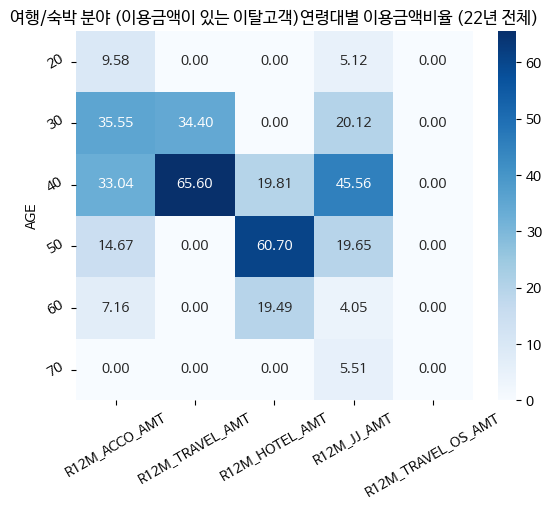

In [400]:
sns.heatmap(df_12m_exited_travel, cmap='Blues', annot=True, fmt=".2f")
plt.title('여행/숙박 분야 (이용금액이 있는 이탈고객)연령대별 이용금액비율 (22년 전체)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

In [395]:
df_12m_exited_trans

R12M_TRANS_AMT  R12M_CAR_AMT  R12M_CAR_SERVICE_AMT  R12M_OIL_AMT  \
AGE                                                                     
20            13.42           0.0                  0.21          2.89   
30            38.38           0.0                 16.72         20.10   
40            25.65           0.0                 13.79         26.82   
50            14.99           0.0                 50.22         26.42   
60             6.45           0.0                 19.06         18.81   
70             1.10           0.0                  0.00          4.96   

     R12M_E_CHARGE_AMT  
AGE                     
20                 0.0  
30                 0.0  
40                 0.0  
50                 0.0  
60                 0.0  
70                 0.0

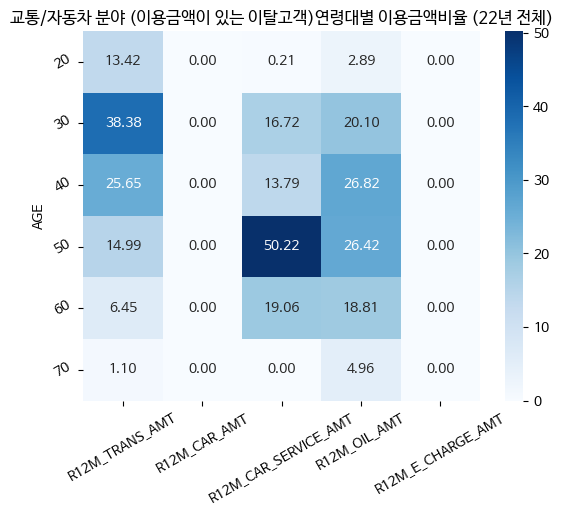

In [401]:
sns.heatmap(df_12m_exited_trans, cmap='Blues', annot=True, fmt=".2f")
plt.title('교통/자동차 분야 (이용금액이 있는 이탈고객)연령대별 이용금액비율 (22년 전체)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

In [396]:
df_12m_exited_health

R12M_BEAUTY_AMT  R12M_MED_AMT
AGE                               
20              7.32          2.96
30             27.73         18.19
40             30.55         29.11
50             23.07         25.44
60              9.60         18.06
70              1.72          6.24

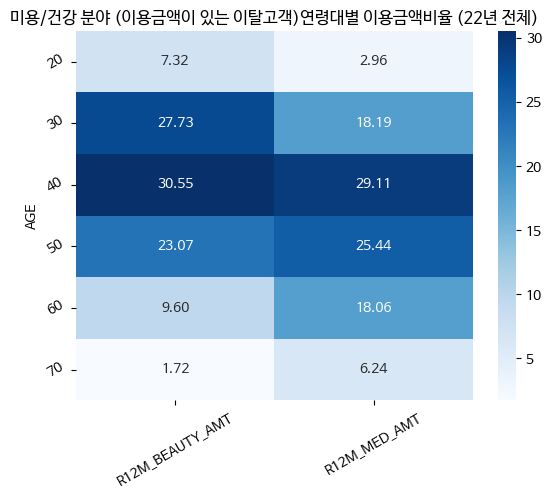

In [402]:
sns.heatmap(df_12m_exited_health, cmap='Blues', annot=True, fmt=".2f")
plt.title('미용/건강 분야 (이용금액이 있는 이탈고객)연령대별 이용금액비율 (22년 전체)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

In [397]:
df_12m_exited_house

R12M_HOUSEHOLD_AMT  R12M_EDU_AMT
AGE                                  
20                 3.45          1.20
30                20.01         28.54
40                31.33         60.86
50                26.01          9.40
60                15.96          0.00
70                 3.24          0.00

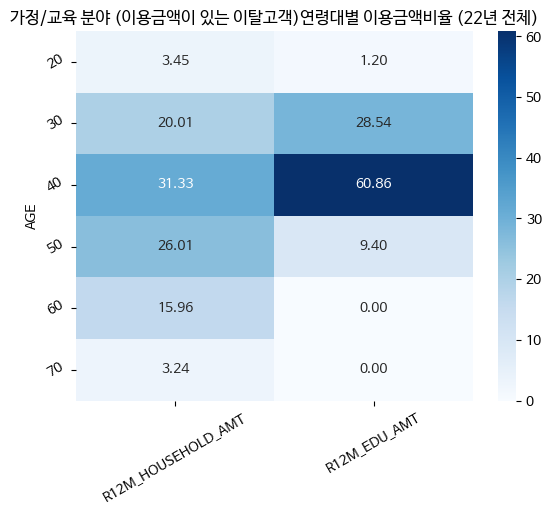

In [403]:
sns.heatmap(df_12m_exited_house, cmap='Blues', annot=True, fmt=".2f")
plt.title('가정/교육 분야 (이용금액이 있는 이탈고객)연령대별 이용금액비율 (22년 전체)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

## 이용금액이 있는 유지고객

In [404]:
# 유지고객 추출
usecols = [3, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 738]

df_12m = df[df.columns[usecols]]
df_12m = df_12m[df_12m['이탈여부'] == 0]
df_12m = df_12m.iloc[:, 0:27]  # 이탈여부 drop
df_12m

AGE  R12M_FOOD_AMT  R12M_ENT_AMT  R12M_DEP_AMT  R12M_MART_AMT  \
0        35              0             0             0              0   
1        50            380             0           512              0   
3        25            179             0             0              0   
4        40            356             0             0              0   
5        55            724             0             0              0   
...     ...            ...           ...           ...            ...   
329994   40            763             0             0              0   
329995   55            395             0             0              0   
329996   60              0             0             0              0   
329998   45              0             0             0              0   
329999   55            105             0             0              0   

        R12M_SSM_AMT  R12M_CLOTHES_AMT  R12M_CUL_AMT  R12M_ACCO_AMT  \
0                  0                 0             0              0   
1                  0                 0             0              0   
3                  0                 0             0              0   
4                703                 0             0              0   
5               1228                 0             0              0   
...              ...               ...           ...            ...   
329994          1394                 0           202              0   
329995           217                 0             0              0   
329996             0                 0             0              0   
329998             0                 0             0              0   
329999           156                 0             0              0   

        R12M_TRAVEL_AMT  ...  R12M_CAR_SERVICE_AMT  R12M_OIL_AMT  \
0                     0  ...                     0             0   
1                     0  ...                     0             0   
3                     0  ...                     0             0   
4                     0  ...                     0             0   
5                     0  ...                     0          1235   
...                 ...  ...                   ...           ...   
329994                0  ...                     0           729   
329995                0  ...                     0             0   
329996                0  ...                     0             0   
329998                0  ...                     0             0   
329999                0  ...                     0             0   

        R12M_E_COMM_AMT  R12M_DLV_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  \
0                     0             0               0            0   
1                     0             0               0            0   
3                     0             0               0            0   
4                  3293          1501               0            0   
5                     0             0               0            0   
...                 ...           ...             ...          ...   
329994             1919             0               0            0   
329995             1064             0               0            0   
329996                0             0               0            0   
329998                0             0               0            0   
329999                0             0               0            0   

        R12M_TRAVEL_OS_AMT  R12M_STARBUCKS_AMT  R12M_E_CHARGE_AMT  \
0                        0                   0                  0   
1                        0                   0                  0   
3                        0                   0                  0   
4                        0                   0                  0   
5                        0                   0                  0   
...                    ...                 ...                ...   
329994                   0                   0                  0   
329995                   0                   0                  0   

In [406]:
# 연령대 수정
df_12m = df_12m.replace({'AGE' : 25}, 20)
df_12m = df_12m.replace({'AGE' : 35}, 30)
df_12m = df_12m.replace({'AGE' : 45}, 40)
df_12m = df_12m.replace({'AGE' : 55}, 50)
df_12m = df_12m.replace({'AGE' : 65}, 60)
df_12m.groupby('AGE').sum()

R12M_FOOD_AMT  R12M_ENT_AMT  R12M_DEP_AMT  R12M_MART_AMT  R12M_SSM_AMT  \
AGE                                                                           
20        12505378         10514       1175564         956845       8848451   
30        30733643          5156       3224194        6146655      31166444   
40        34822654          5310       2970141       10294225      46960756   
50        27971697          1129       1937953        8128456      37796292   
60        12326327             0        805349        4616959      19666605   
70         3041658             0        249089        1437813       5653074   

     R12M_CLOTHES_AMT  R12M_CUL_AMT  R12M_ACCO_AMT  R12M_TRAVEL_AMT  \
AGE                                                                   
20             505644       1507319          85825             5415   
30             917578       3778952         219578            17220   
40            1158916       5425194         226480            13115   
50             905479       4624920         120996            15878   
60             425396       1733118          50976             3807   
70              77593        298152          10961                0   

     R12M_TRANS_AMT  ...  R12M_CAR_SERVICE_AMT  R12M_OIL_AMT  R12M_E_COMM_AMT  \
AGE                  ...                                                        
20           958310  ...                  9137       2383155         19336608   
30          1599017  ...                100414      11359834         61601826   
40          1155184  ...                265867      16676995         73855346   
50           848250  ...                772271      18457594         37769687   
60           331315  ...                606268      13923944         11800969   
70            69841  ...                 17902       4623255          2133002   

     R12M_DLV_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  R12M_TRAVEL_OS_AMT  \
AGE                                                                  
20        3553606               0       125555                   0   
30        8986326            5803       446372                   0   
40        6521423            9935       849831                   0   
50        1622704            5903       752768                   0   
60         121887            6643       309502                   0   
70          15777            4454        85327                   0   

     R12M_STARBUCKS_AMT  R12M_E_CHARGE_AMT  R12M_CONV_AMT  
AGE                                                        
20               177265                  0        4915028  
30               391088                  0       11971302  
40               207453                  0       11618557  
50                80780                  0        7240072  
60                14153                  0        2101861  
70                 1396                  0         257965  

[6 rows x 26 columns]

In [407]:
# 카테고리별 업종 컬럼 인덱스
col1 = [0, 1, 2, 4, 5, 20, 24, 26]
col2 = [0, 3, 6, 7, 15, 19]
col3 = [0, 8, 9, 21, 22, 23]
col4 = [0, 10, 16, 17, 18, 25]
col5 = [0, 11, 14]
col6 = [0, 12, 13]

In [410]:
# 카테고리별 이탈고객 dataframe 생성
df_12m_not_exited_food = df_12m[df_12m.columns[col1]]
df_12m_not_exited_shopping = df_12m[df_12m.columns[col2]]
df_12m_not_exited_travel = df_12m[df_12m.columns[col3]]
df_12m_not_exited_trans = df_12m[df_12m.columns[col4]]
df_12m_not_exited_health = df_12m[df_12m.columns[col5]]
df_12m_not_exited_house = df_12m[df_12m.columns[col6]]

In [411]:
# 이용금액이 있는 건만 남기기
df_12m_not_exited_food = df_12m_not_exited_food.query('R12M_FOOD_AMT != 0 or R12M_ENT_AMT != 0 or R12M_MART_AMT != 0 or R12M_SSM_AMT != 0 or R12M_DLV_AMT != 0 or R12M_STARBUCKS_AMT != 0 or R12M_CONV_AMT != 0')
df_12m_not_exited_food = df_12m_not_exited_food.groupby('AGE').sum()
df_12m_not_exited_food

R12M_FOOD_AMT  R12M_ENT_AMT  R12M_MART_AMT  R12M_SSM_AMT  R12M_DLV_AMT  \
AGE                                                                           
20        12505378         10514         956845       8848451       3553606   
30        30733643          5156        6146655      31166444       8986326   
40        34822654          5310       10294225      46960756       6521423   
50        27971697          1129        8128456      37796292       1622704   
60        12326327             0        4616959      19666605        121887   
70         3041658             0        1437813       5653074         15777   

     R12M_STARBUCKS_AMT  R12M_CONV_AMT  
AGE                                     
20               177265        4915028  
30               391088       11971302  
40               207453       11618557  
50                80780        7240072  
60                14153        2101861  
70                 1396         257965

In [412]:
# 이용금액이 있는 건만 남기기
df_12m_not_exited_shopping = df_12m_not_exited_shopping.query('R12M_DEP_AMT != 0 or R12M_CLOTHES_AMT != 0 or R12M_CUL_AMT != 0 or R12M_FURN_AMT != 0 or R12M_E_COMM_AMT != 0')
df_12m_not_exited_shopping = df_12m_not_exited_shopping.groupby('AGE').sum()
df_12m_not_exited_shopping

R12M_DEP_AMT  R12M_CLOTHES_AMT  R12M_CUL_AMT  R12M_FURN_AMT  \
AGE                                                                
20        1175564            505644       1507319          21927   
30        3224194            917578       3778952         127829   
40        2970141           1158916       5425194         202326   
50        1937953            905479       4624920         138352   
60         805349            425396       1733118          55674   
70         249089             77593        298152           7767   

     R12M_E_COMM_AMT  
AGE                   
20          19336608  
30          61601826  
40          73855346  
50          37769687  
60          11800969  
70           2133002

In [413]:
# 이용금액이 있는 건만 남기기
df_12m_not_exited_travel = df_12m_not_exited_travel.query('R12M_ACCO_AMT != 0 or R12M_TRAVEL_AMT != 0 or R12M_HOTEL_AMT != 0 or R12M_JJ_AMT != 0 or R12M_TRAVEL_OS_AMT != 0')
df_12m_not_exited_travel = df_12m_not_exited_travel.groupby('AGE').sum()
df_12m_not_exited_travel

R12M_ACCO_AMT  R12M_TRAVEL_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  \
AGE                                                                
20           85825             5415               0       125555   
30          219578            17220            5803       446372   
40          226480            13115            9935       849831   
50          120996            15878            5903       752768   
60           50976             3807            6643       309502   
70           10961                0            4454        85327   

     R12M_TRAVEL_OS_AMT  
AGE                      
20                    0  
30                    0  
40                    0  
50                    0  
60                    0  
70                    0

In [414]:
# 이용금액이 있는 건만 남기기
df_12_not_exited_trans = df_12m_not_exited_trans.query('R12M_TRANS_AMT != 0 or R12M_CAR_AMT != 0 or R12M_CAR_SERVICE_AMT != 0 or R12M_OIL_AMT != 0 or R12M_E_CHARGE_AMT != 0')
df_12m_not_exited_trans = df_12m_not_exited_trans.groupby('AGE').sum()
df_12m_not_exited_trans

R12M_TRANS_AMT  R12M_CAR_AMT  R12M_CAR_SERVICE_AMT  R12M_OIL_AMT  \
AGE                                                                     
20           958310             0                  9137       2383155   
30          1599017             0                100414      11359834   
40          1155184             0                265867      16676995   
50           848250             0                772271      18457594   
60           331315             0                606268      13923944   
70            69841             0                 17902       4623255   

     R12M_E_CHARGE_AMT  
AGE                     
20                   0  
30                   0  
40                   0  
50                   0  
60                   0  
70                   0

In [415]:
# 이용금액이 있는 건만 남기기
df_12m_not_exited_health = df_12m_not_exited_health.query('R12M_BEAUTY_AMT != 0 or R12M_MED_AMT != 0')
df_12m_not_exited_health = df_12m_not_exited_health.groupby('AGE').sum()
df_12m_not_exited_health

R12M_BEAUTY_AMT  R12M_MED_AMT
AGE                               
20            622298       1591840
30           1508517       5920445
40           1785331      10364744
50           1532649      10212191
60            698758       7484785
70            150921       3230727

In [416]:
# 이용금액이 있는 건만 남기기
df_12m_not_exited_house = df_12m_not_exited_house.query('R12M_HOUSEHOLD_AMT != 0 or R12M_EDU_AMT != 0')
df_12m_not_exited_house = df_12m_not_exited_house.groupby('AGE').sum()
df_12m_not_exited_house

R12M_HOUSEHOLD_AMT  R12M_EDU_AMT
AGE                                  
20              3081013        282894
30             13323882       4831646
40             24559865      13276479
50             22950619       2243272
60             12942534         26926
70              3641482          8763

In [428]:
# 백분율 전환
df_12m_not_exited_food = df_12m_not_exited_food.div(df_12m_not_exited_food.sum()) * 100
df_12m_not_exited_shopping = df_12m_not_exited_shopping.div(df_12m_not_exited_shopping.sum()) * 100
df_12m_not_exited_travel = df_12m_not_exited_travel.div(df_12m_not_exited_travel.sum()) * 100
df_12m_not_exited_trans = df_12m_not_exited_trans.div(df_12m_not_exited_trans.sum()) * 100
df_12m_not_exited_health = df_12m_not_exited_health.div(df_12m_not_exited_health.sum()) * 100
df_12m_not_exited_house = df_12m_not_exited_house.div(df_12m_not_exited_house.sum()) * 100

df_12m_not_exited_food = df_12m_not_exited_food.round(2)
df_12m_not_exited_shopping = df_12m_not_exited_shopping.round(2)
df_12m_not_exited_travel = df_12m_not_exited_travel.round(2)
df_12m_not_exited_trans = df_12m_not_exited_trans.round(2)
df_12m_not_exited_health = df_12m_not_exited_health.round(2)
df_12m_not_exited_house = df_12m_not_exited_house.round(2)

# nan 채우기
df_12m_not_exited_travel = df_12m_not_exited_travel.fillna(0)
df_12m_not_exited_trans = df_12m_not_exited_trans.fillna(0)

In [418]:
df_12m_not_exited_food

R12M_FOOD_AMT  R12M_ENT_AMT  R12M_MART_AMT  R12M_SSM_AMT  R12M_DLV_AMT  \
AGE                                                                           
20           10.30         47.56           3.03          5.90         17.07   
30           25.32         23.32          19.46         20.76         43.16   
40           28.68         24.02          32.60         31.29         31.32   
50           23.04          5.11          25.74         25.18          7.79   
60           10.15          0.00          14.62         13.10          0.59   
70            2.51          0.00           4.55          3.77          0.08   

     R12M_STARBUCKS_AMT  R12M_CONV_AMT  
AGE                                     
20                20.33          12.90  
30                44.84          31.42  
40                23.79          30.49  
50                 9.26          19.00  
60                 1.62           5.52  
70                 0.16           0.68

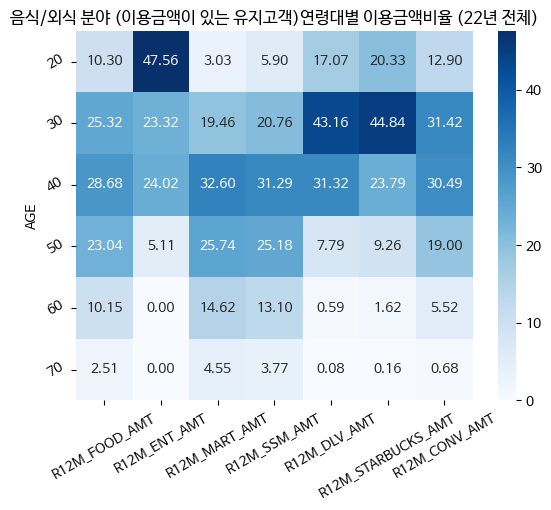

In [438]:
sns.heatmap(df_12m_not_exited_food, cmap='Blues', annot=True, fmt=".2f")
plt.title('음식/외식 분야 (이용금액이 있는 유지고객)연령대별 이용금액비율 (22년 전체)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

In [420]:
df_12m_not_exited_shopping

R12M_DEP_AMT  R12M_CLOTHES_AMT  R12M_CUL_AMT  R12M_FURN_AMT  \
AGE                                                                
20          11.34             12.67          8.68           3.96   
30          31.11             22.99         21.76          23.08   
40          28.66             29.04         31.24          36.53   
50          18.70             22.69         26.63          24.98   
60           7.77             10.66          9.98          10.05   
70           2.40              1.94          1.72           1.40   

     R12M_E_COMM_AMT  
AGE                   
20              9.36  
30             29.83  
40             35.77  
50             18.29  
60              5.71  
70              1.03

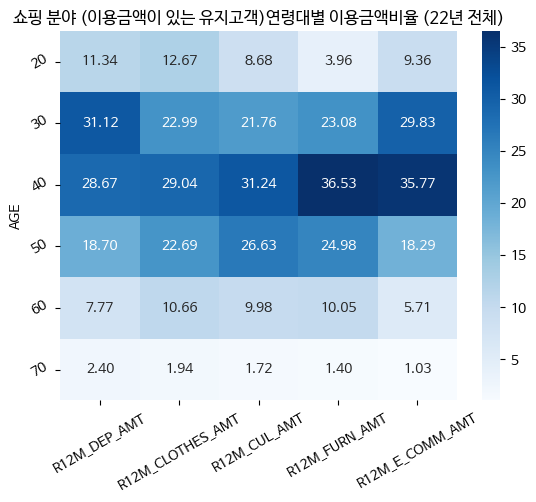

In [433]:
sns.heatmap(df_12m_not_exited_shopping, cmap='Blues', annot=True, fmt=".2f")
plt.title('쇼핑 분야 (이용금액이 있는 유지고객)연령대별 이용금액비율 (22년 전체)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

In [429]:
df_12m_not_exited_travel

R12M_ACCO_AMT  R12M_TRAVEL_AMT  R12M_HOTEL_AMT  R12M_JJ_AMT  \
AGE                                                                
20           12.01             9.77            0.00         4.89   
30           30.72            31.06           17.73        17.37   
40           31.68            23.66           30.35        33.08   
50           16.93            28.64           18.03        29.30   
60            7.13             6.87           20.29        12.05   
70            1.53             0.00           13.60         3.32   

     R12M_TRAVEL_OS_AMT  
AGE                      
20                  0.0  
30                  0.0  
40                  0.0  
50                  0.0  
60                  0.0  
70                  0.0

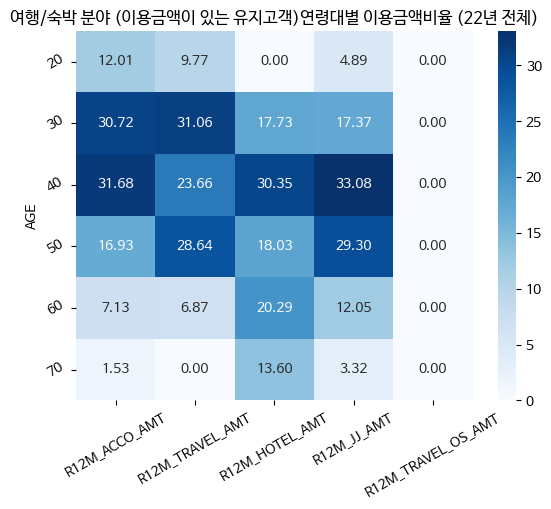

In [434]:
sns.heatmap(df_12m_not_exited_travel, cmap='Blues', annot=True, fmt=".2f")
plt.title('여행/숙박 분야 (이용금액이 있는 유지고객)연령대별 이용금액비율 (22년 전체)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

In [431]:
df_12m_not_exited_trans

R12M_TRANS_AMT  R12M_CAR_AMT  R12M_CAR_SERVICE_AMT  R12M_OIL_AMT  \
AGE                                                                     
20            19.31           0.0                  0.52          3.53   
30            32.23           0.0                  5.67         16.85   
40            23.28           0.0                 15.00         24.73   
50            17.10           0.0                 43.59         27.38   
60             6.68           0.0                 34.22         20.65   
70             1.41           0.0                  1.01          6.86   

     R12M_E_CHARGE_AMT  
AGE                     
20                 0.0  
30                 0.0  
40                 0.0  
50                 0.0  
60                 0.0  
70                 0.0

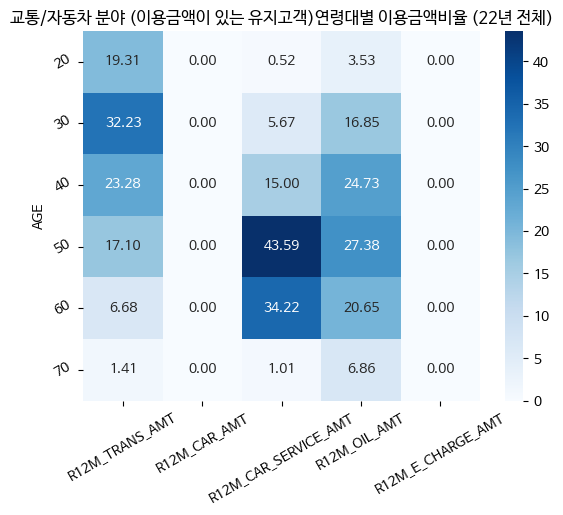

In [435]:
sns.heatmap(df_12m_not_exited_trans, cmap='Blues', annot=True, fmt=".2f")
plt.title('교통/자동차 분야 (이용금액이 있는 유지고객)연령대별 이용금액비율 (22년 전체)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

In [424]:
df_12m_not_exited_health

R12M_BEAUTY_AMT  R12M_MED_AMT
AGE                               
20              9.88          4.10
30             23.95         15.26
40             28.35         26.71
50             24.33         26.32
60             11.09         19.29
70              2.40          8.33

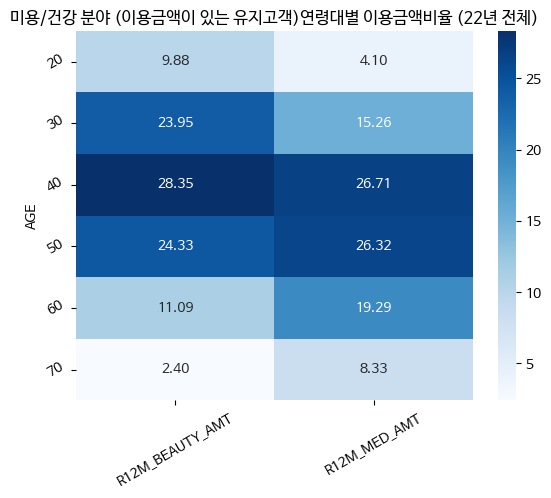

In [436]:
sns.heatmap(df_12m_not_exited_health, cmap='Blues', annot=True, fmt=".2f")
plt.title('미용/건강 분야 (이용금액이 있는 유지고객)연령대별 이용금액비율 (22년 전체)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

In [425]:
df_12m_not_exited_house

R12M_HOUSEHOLD_AMT  R12M_EDU_AMT
AGE                                  
20                 3.83          1.37
30                16.55         23.38
40                30.51         64.23
50                28.51         10.85
60                16.08          0.13
70                 4.52          0.04

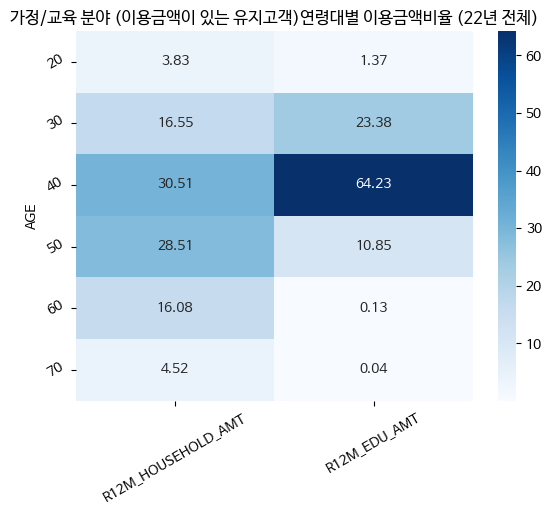

In [437]:
sns.heatmap(df_12m_not_exited_house, cmap='Blues', annot=True, fmt=".2f")
plt.title('가정/교육 분야 (이용금액이 있는 유지고객)연령대별 이용금액비율 (22년 전체)')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()